In [1]:
%pip install pandas
%pip install matplotlib
%pip install statsmodels
%pip install seaborn
%pip install scikit-learn
%pip install missingno
%pip install tabulate
#%pip install eli5


  Using cached pandas-2.2.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached numpy-2.1.3-cp311-cp311-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp311-cp311-macosx_11_0_arm64.whl (11.3 MB)
Using cached numpy-2.1.3-cp311-cp311-macosx_14_0_arm64.whl (5.4 MB)
Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)
Note: you may need to restart the kernel to use updated packages.
  Using cached matplotlib-3.9.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp311-cp311-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.55.0-cp311-cp311-macosx_10_9_universal2.whl.metadata (164 kB)
  Using cached kiwisolver-1.4.7-cp311-cp311-macosx_11_0_arm64.whl.metadata 

In [1]:
import numpy as np  # Importing NumPy for numerical operations
import pandas as pd  # Importing Pandas for data manipulation and analysis
import seaborn as sns  # Importing Seaborn for statistical data visualization
import matplotlib.pylab as plt  # Importing Matplotlib for plotting and visualization
from matplotlib import pyplot  # Importing pyplot for simplified plotting functions
from sklearn import preprocessing  # Importing preprocessing module for data scaling and normalization
import statsmodels.api as sm  # Importing statsmodels for statistical models like OLS regression
from statsmodels.graphics.gofplots import qqplot  # Importing qqplot for Q-Q plots for normality checking
import missingno as msno  # Importing missingno for visualizing missing data patterns

from sklearn import model_selection  # Importing model selection utilities for cross-validation
from sklearn.model_selection import train_test_split  # Importing train_test_split for splitting data into training and test sets
from sklearn.linear_model import LinearRegression  # Importing Linear and Logistic Regression models
from sklearn.model_selection import train_test_split  # Importing train_test_split again (redundant, already imported earlier)
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score  # Importing various metrics for model evaluation
from tabulate import tabulate  # Importing tabulate for pretty-printing tables in the output
from sklearn.metrics import mean_squared_error  # Importing mean_squared_error for evaluating regression model performance

In [2]:
hitters = pd.read_csv("datasets/hitter.csv")
pitchers = pd.read_csv("datasets/pitcher.csv")
teams = pd.read_csv("datasets/teams.csv")



Our goal is find if any performance metrics can explain the salaries of the players. There are 3 files with datasets of hitters, pitchers and teams. We first focus on hitters data and then move on to rest of the dataframes.

##### **We remove missing values from the dataset**
We examine if the dataset has any null values by using `misssingno` library and panda's df.null().

In [3]:
hitters.isnull().sum()

Hitter                      0
NumberAtBat1986             0
NumberHits1986              0
NumberHomeRuns1986          0
NumberRuns1986              0
NumberRunsBat1986           0
NumberWalks1986             0
YearsMajorleag              0
NumberBatCareer             0
NumberHitsCareer            0
NumberHomeRunsCareer        0
NumberRunsCareer            0
NumberRunsBatCareer         0
NumberWalksCareer           0
LeagueEnd1986               0
DivisionEnd1986             0
TeamEnd1986                 0
Position1986                0
PutOuts1986                 0
Assists1986                 0
Errors1986                  0
AnnualSalaryOpenDay1987    59
League1987                  0
Team1987                    0
dtype: int64

<Axes: >

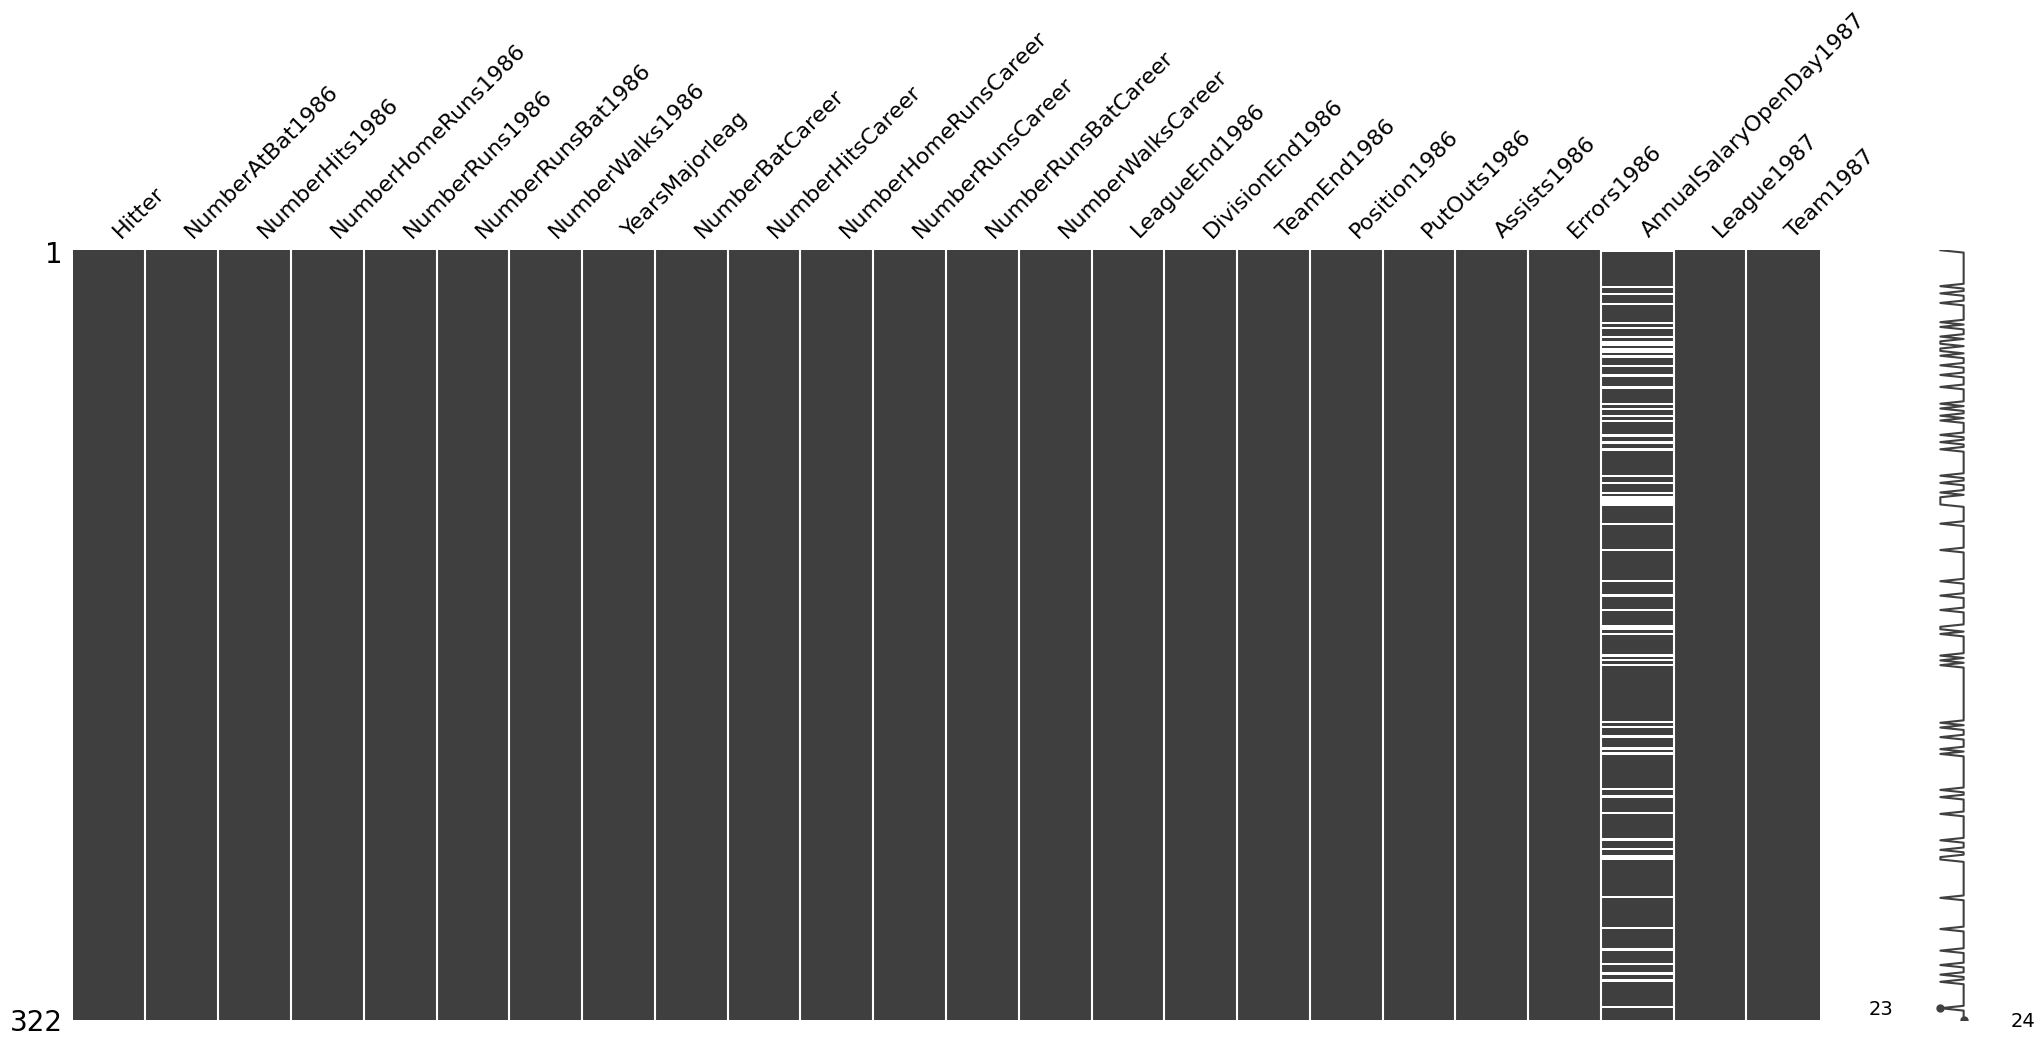

In [4]:
msno.matrix(hitters)

There are 59 null values in the salaries column, so we safely remove these columns as salary is the main component of interest and few columns clearly lack them.

In [5]:
hitters.describe()

NumberAtBat1986  NumberHits1986  NumberHomeRuns1986  NumberRuns1986  \
count       322.000000      322.000000          322.000000      322.000000   
mean        380.928571      101.024845           10.770186       50.909938   
std         153.404981       46.454741            8.709037       26.024095   
min          16.000000        1.000000            0.000000        0.000000   
25%         255.250000       64.000000            4.000000       30.250000   
50%         379.500000       96.000000            8.000000       48.000000   
75%         512.000000      137.000000           16.000000       69.000000   
max         687.000000      238.000000           40.000000      130.000000   

       NumberRunsBat1986  NumberWalks1986  YearsMajorleag  NumberBatCareer  \
count         322.000000       322.000000      322.000000        322.00000   
mean           48.027950        38.742236        7.444099       2648.68323   
std            26.166895        21.639327        4.926087       2324.20587   
min             0.000000         0.000000        1.000000         19.00000   
25%            28.000000        22.000000        4.000000        816.75000   
50%            44.000000        35.000000        6.000000       1928.00000   
75%            64.750000        53.000000       11.000000       3924.25000   
max           121.000000       105.000000       24.000000      14053.00000   

       NumberHitsCareer  NumberHomeRunsCareer  NumberRunsCareer  \
count        322.000000            322.000000        322.000000   
mean         717.571429             69.490683        358.795031   
std          654.472627             86.266061        334.105886   
min            4.000000              0.000000          1.000000   
25%          209.000000             14.000000        100.250000   
50%          508.000000             37.500000        247.000000   
75%         1059.250000             90.000000        526.250000   
max         4256.000000            548.000000       2165.000000   

       NumberRunsBatCareer  NumberWalksCareer  PutOuts1986  Assists1986  \
count           322.000000         322.000000   322.000000   322.000000   
mean            330.118012         260.239130   288.937888   106.913043   
std             333.219617         267.058085   280.704614   136.854876   
min               0.000000           0.000000     0.000000     0.000000   
25%              88.750000          67.250000   109.250000     7.000000   
50%             220.500000         170.500000   212.000000    39.500000   
75%             426.250000         339.250000   325.000000   166.000000   
max            1659.000000        1566.000000  1378.000000   492.000000   

       Errors1986  AnnualSalaryOpenDay1987  
count  322.000000               263.000000  
mean     8.040373               535.925882  
std      6.368359               451.118681  
min      0.000000                67.500000  
25%      3.000000               190.000000  
50%      6.000000               425.000000  
75%     11.000000               750.000000  
max     32.000000              2460.000000

In [6]:
pitchers.describe()

NumberWins1986  NumberLoss1986  EarnedRunAvg1986  NumberGames1986  \
count      206.000000      206.000000        206.000000       206.000000   
mean         8.781553        8.233010          3.875922        39.660194   
std          4.557048        3.688357          0.940507        15.527193   
min          0.000000        0.000000          1.410000         1.000000   
25%          5.000000        5.000000          3.225000        30.000000   
50%          9.000000        8.000000          3.835000        35.000000   
75%         11.000000       11.000000          4.537500        50.000000   
max         24.000000       18.000000          8.590000        83.000000   

       NumberInningsPitched1986  NumberSaves1986  NumberYearsMajorLeague  \
count                206.000000       206.000000              206.000000   
mean                 145.184466         4.378641                6.412621   
std                   62.469395         8.261715                4.668487   
min                    4.000000         0.000000                1.000000   
25%                   92.375000         0.000000                3.000000   
50%                  138.600000         0.000000                5.000000   
75%                  198.175000         5.000000                9.000000   
max                  275.100000        46.000000               23.000000   

       NumberWinsCareer  NumberLossCareer  EarnedRunAvgCareer  \
count        206.000000        206.000000          206.000000   
mean          53.606796         47.621359            3.700291   
std           58.850996         47.773779            0.637874   
min            1.000000          1.000000            2.230000   
25%           16.000000         14.000000            3.275000   
50%           35.500000         31.500000            3.675000   
75%           64.500000         64.750000            4.082500   
max          323.000000        261.000000            5.480000   

       NumberGamesCareer  NumberInningsPitchedCareer  NumberSavesCareer  \
count         206.000000                  206.000000         206.000000   
mean          213.150485                  887.236893          20.830097   
std           181.208280                  951.922261          42.461061   
min             4.000000                   19.000000           0.000000   
25%            80.250000                  263.250000           0.000000   
50%           154.500000                  548.000000           3.000000   
75%           298.750000                 1174.250000          15.750000   
max           853.000000                 5264.200000         278.000000   

       AnnualSalaryOpenDay1987  
count               176.000000  
mean                497.535250  
std                 371.974464  
min                  62.500000  
25%                 158.750000  
50%                 417.500000  
75%                 756.250000  
max                1850.000000

In [7]:
# Transform the columns with categroical data like teamnames, leaugues and division indexes we know
TEAM_NAME_MAPPINGS = {
  "N.Y.":"New York",
"Phi.":"Philadelphia",
"St.L.":"St. Louis",
"Mon.":"Montreal",
"Chi.":"Chicago",
"Pit.":"Pittsburgh",
"Hou.":"Houston",
"Cin.":"Cincinnati",
"S.F.":"San Francisco",
"S.D.":"San Diego",
"L.A.":"Los Angeles",
"Atl.":"Atlanta",
"Bos.":"Boston",
"Det.":"Detroit",
"Tor.":"Toronto",
"Cle.":"Cleveland",
"Mil.":"Milwaukee",
"Bal.":"Baltimore",
"Cal.":"California",
"Tex.":"Texas",
"K.C.":"Kansas City",
"Oak.":"Oakland",
"Min.":"Minnesota",
"Sea.":"Seattle",
}
TEAM_NAME_INDEXES = (
  "N.Y.",
"Phi.",
"St.L.",
"Mon.",
"Chi.",
"Pit.",
"Hou.",
"Cin.",
"S.F.",
"S.D.",
"L.A.",
"Atl.",
"Bos.",
"Det.",
"Tor.",
"Cle.",
"Mil.",
"Bal.",
"Cal.",
"Tex.",
"K.C.",
"Oak.",
"Min.",
"Sea.",
)
LEAGUE_MAPPINGS = {"N":"National","A":"American"}
LEAGUE_INDEXES = ("N", "A")
DIVISION_MAPPINGS = {"W":"WEST","E":"EAST"}
DIVISION_INDEXES = ("W", "E")
PLAYER_POSITION_MAPPINGS = {
  "1B":   "First Base",
     "2B":   "Second Base",
     "SS":   "Short Stop",
     "3B":   "Third Base",
     "RF":  "Right Field",
     "CF":   "Center Field",
     "LF":   "Left Field",
     "C":    "Catcher",
     "DH":   "Designated Hitter",
     "OF":   "Outfield",
     "UT":   "Utility",
     "OS":   "Outfield and Short Stop",
     "3S":   "Third Base and Short Stop",
     "13":   "First and Third Base",
     "3O":   "Third Base and Outfield",
     "O1":   "Outfield and First Base",
     "S3":   "Short Stop and Third Base",
     "32":   "Third and Second Base",
     "DO":   "Designated Hitter and Outfield",
     "OD":   "Outfield and Designated Hitter",
     "CD":   "Catcher and Designated Hitter",
     "CS":   "Catcher and Short Stop",
     "23":   "Second and Third Base",
     "1O":   "First Base and Outfield",
     "2S":  "Second Base and Short Stop",
}
PLAYER_POSITION_INDEXES = tuple(PLAYER_POSITION_MAPPINGS.keys())

hitters.head()


Hitter  NumberAtBat1986  NumberHits1986  NumberHomeRuns1986  \
0     Andy Allanson              293              66                   1   
1        Alan Ashby              315              81                   7   
2       Alvin Davis              479             130                  18   
3      Andre Dawson              496             141                  20   
4  Andres Galarraga              321              87                  10   

   NumberRuns1986  NumberRunsBat1986  NumberWalks1986  YearsMajorleag  \
0              30                 29               14               1   
1              24                 38               39              14   
2              66                 72               76               3   
3              65                 78               37              11   
4              39                 42               30               2   

   NumberBatCareer  NumberHitsCareer  ...  LeagueEnd1986  DivisionEnd1986  \
0              293                66  ...              A                E   
1             3449               835  ...              N                W   
2             1624               457  ...              A                W   
3             5628              1575  ...              N                E   
4              396               101  ...              N                E   

   TeamEnd1986  Position1986 PutOuts1986 Assists1986 Errors1986  \
0         Cle.             C         446          33         20   
1         Hou.             C         632          43         10   
2         Sea.            1B         880          82         14   
3         Mon.            RF         200          11          3   
4         Mon.            1B         805          40          4   

  AnnualSalaryOpenDay1987  League1987  Team1987  
0                     NaN           A      Cle.  
1                   475.0           N      Hou.  
2                   480.0           A      Sea.  
3                   500.0           N      Chi.  
4                    91.5           N      Mon.  

[5 rows x 24 columns]

In [8]:
def transform_labels(map):
  def mapper(val):
    return map.index(val)+1
  return mapper
hitters["LeagueEnd1986Labels"] = hitters["LeagueEnd1986"].transform(transform_labels(LEAGUE_INDEXES))
hitters["DivisionEnd1986Labels"] = hitters["DivisionEnd1986"].transform(transform_labels(DIVISION_INDEXES))
hitters["TeamEnd1986Labels"] = hitters["TeamEnd1986"].transform(transform_labels(TEAM_NAME_INDEXES))
hitters["Position1986Labels"] = hitters["Position1986"].transform(transform_labels(PLAYER_POSITION_INDEXES))
hitters["League1987Labels"] = hitters["League1987"].transform(transform_labels(LEAGUE_INDEXES))
hitters["Team1987Labels"] = hitters["Team1987"].transform(transform_labels(TEAM_NAME_INDEXES))
hitters.head()

Hitter  NumberAtBat1986  NumberHits1986  NumberHomeRuns1986  \
0     Andy Allanson              293              66                   1   
1        Alan Ashby              315              81                   7   
2       Alvin Davis              479             130                  18   
3      Andre Dawson              496             141                  20   
4  Andres Galarraga              321              87                  10   

   NumberRuns1986  NumberRunsBat1986  NumberWalks1986  YearsMajorleag  \
0              30                 29               14               1   
1              24                 38               39              14   
2              66                 72               76               3   
3              65                 78               37              11   
4              39                 42               30               2   

   NumberBatCareer  NumberHitsCareer  ...  Errors1986  \
0              293                66  ...          20   
1             3449               835  ...          10   
2             1624               457  ...          14   
3             5628              1575  ...           3   
4              396               101  ...           4   

   AnnualSalaryOpenDay1987  League1987  Team1987 LeagueEnd1986Labels  \
0                      NaN           A      Cle.                   2   
1                    475.0           N      Hou.                   1   
2                    480.0           A      Sea.                   2   
3                    500.0           N      Chi.                   1   
4                     91.5           N      Mon.                   1   

  DivisionEnd1986Labels TeamEnd1986Labels Position1986Labels  \
0                     2                16                  8   
1                     1                 7                  8   
2                     1                24                  1   
3                     2                 4                  5   
4                     2                 4                  1   

   League1987Labels  Team1987Labels  
0                 2              16  
1                 1               7  
2                 2              24  
3                 1               5  
4                 1               4  

[5 rows x 30 columns]

In [9]:
hitters.isnull().sum()

Hitter                      0
NumberAtBat1986             0
NumberHits1986              0
NumberHomeRuns1986          0
NumberRuns1986              0
NumberRunsBat1986           0
NumberWalks1986             0
YearsMajorleag              0
NumberBatCareer             0
NumberHitsCareer            0
NumberHomeRunsCareer        0
NumberRunsCareer            0
NumberRunsBatCareer         0
NumberWalksCareer           0
LeagueEnd1986               0
DivisionEnd1986             0
TeamEnd1986                 0
Position1986                0
PutOuts1986                 0
Assists1986                 0
Errors1986                  0
AnnualSalaryOpenDay1987    59
League1987                  0
Team1987                    0
LeagueEnd1986Labels         0
DivisionEnd1986Labels       0
TeamEnd1986Labels           0
Position1986Labels          0
League1987Labels            0
Team1987Labels              0
dtype: int64

In [10]:
hitters_copy = hitters.dropna()
hitters_copy.isnull().sum()
hitters_copy.shape

(263, 30)

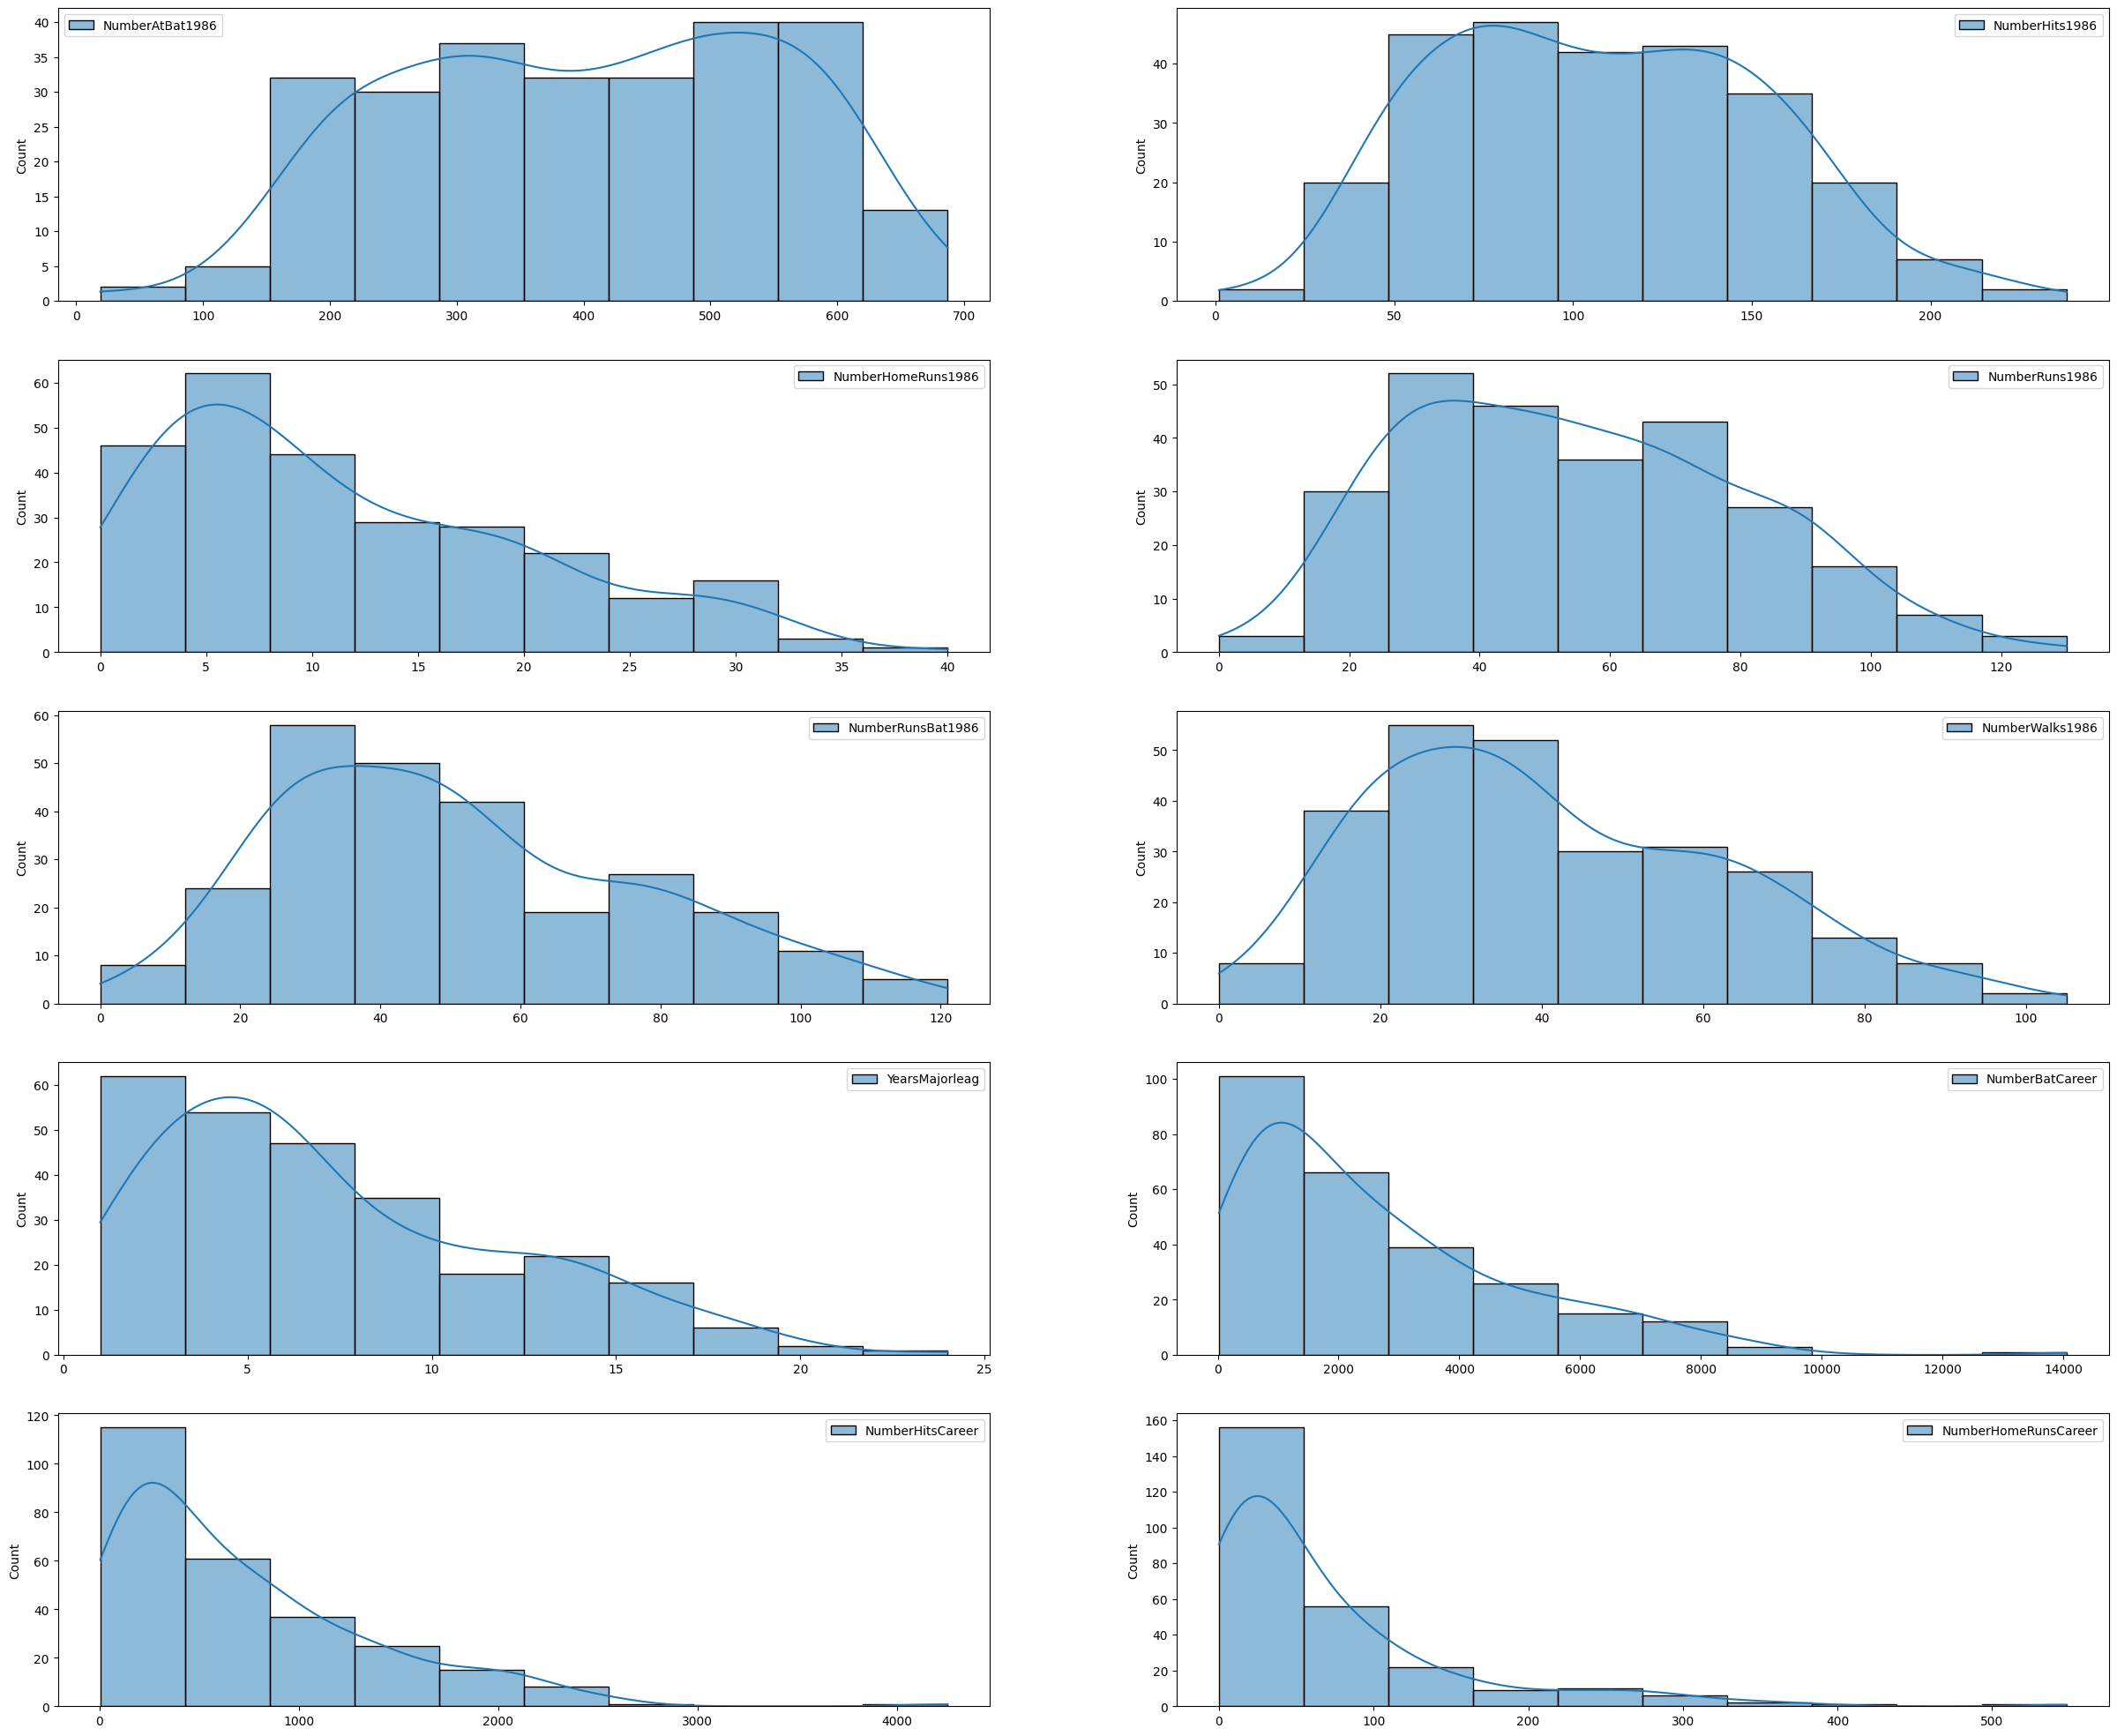

In [11]:
#numerical_ft = [["NumberAtBat1986"],['NumberHits1986'],['NumberHomeRuns1986'],['NumberRuns1986'],['NumberRunsBat1986'],['NumberWalks1986'],['YearsMajorleag'],['NumberBatCareer'],['NumberHitsCareer'],['NumberHomeRunsCareer'],['NumberRunsCareer'],['NumberRunsBatCareer'],['NumberWalksCareer'],['LeagueEnd1986Labels'],['DivisionEnd1986Labels'],['TeamEnd1986Labels'],['Position1986Labels'],['PutOuts1986'],['Assists1986'],['Errors1986'],['AnnualSalaryOpenDay1987'],['League1987Labels'],['Team1987Labels']]
numerical_ft_1 = [
    ["NumberAtBat1986"],['NumberHits1986'],['NumberHomeRuns1986'],['NumberRuns1986'],['NumberRunsBat1986'],['NumberWalks1986'],['YearsMajorleag'],['NumberBatCareer'],['NumberHitsCareer'],['NumberHomeRunsCareer'],
]
numerical_ft_2 = [
    ['NumberRunsCareer'],['NumberRunsBatCareer'],['NumberWalksCareer'],['PutOuts1986'],['Assists1986'],['Errors1986'],['AnnualSalaryOpenDay1987'],
]
numerical_ft_3 = [
    ['LeagueEnd1986Labels'],['DivisionEnd1986Labels'],['TeamEnd1986Labels'],['Position1986Labels'],['League1987Labels'],['Team1987Labels']
]

plt.figure(figsize=(30,25))
for i,col in enumerate(numerical_ft_1,1):
    plt.subplot(5,2,i)
    sns.histplot(hitters_copy[col],kde=True,bins = 10)

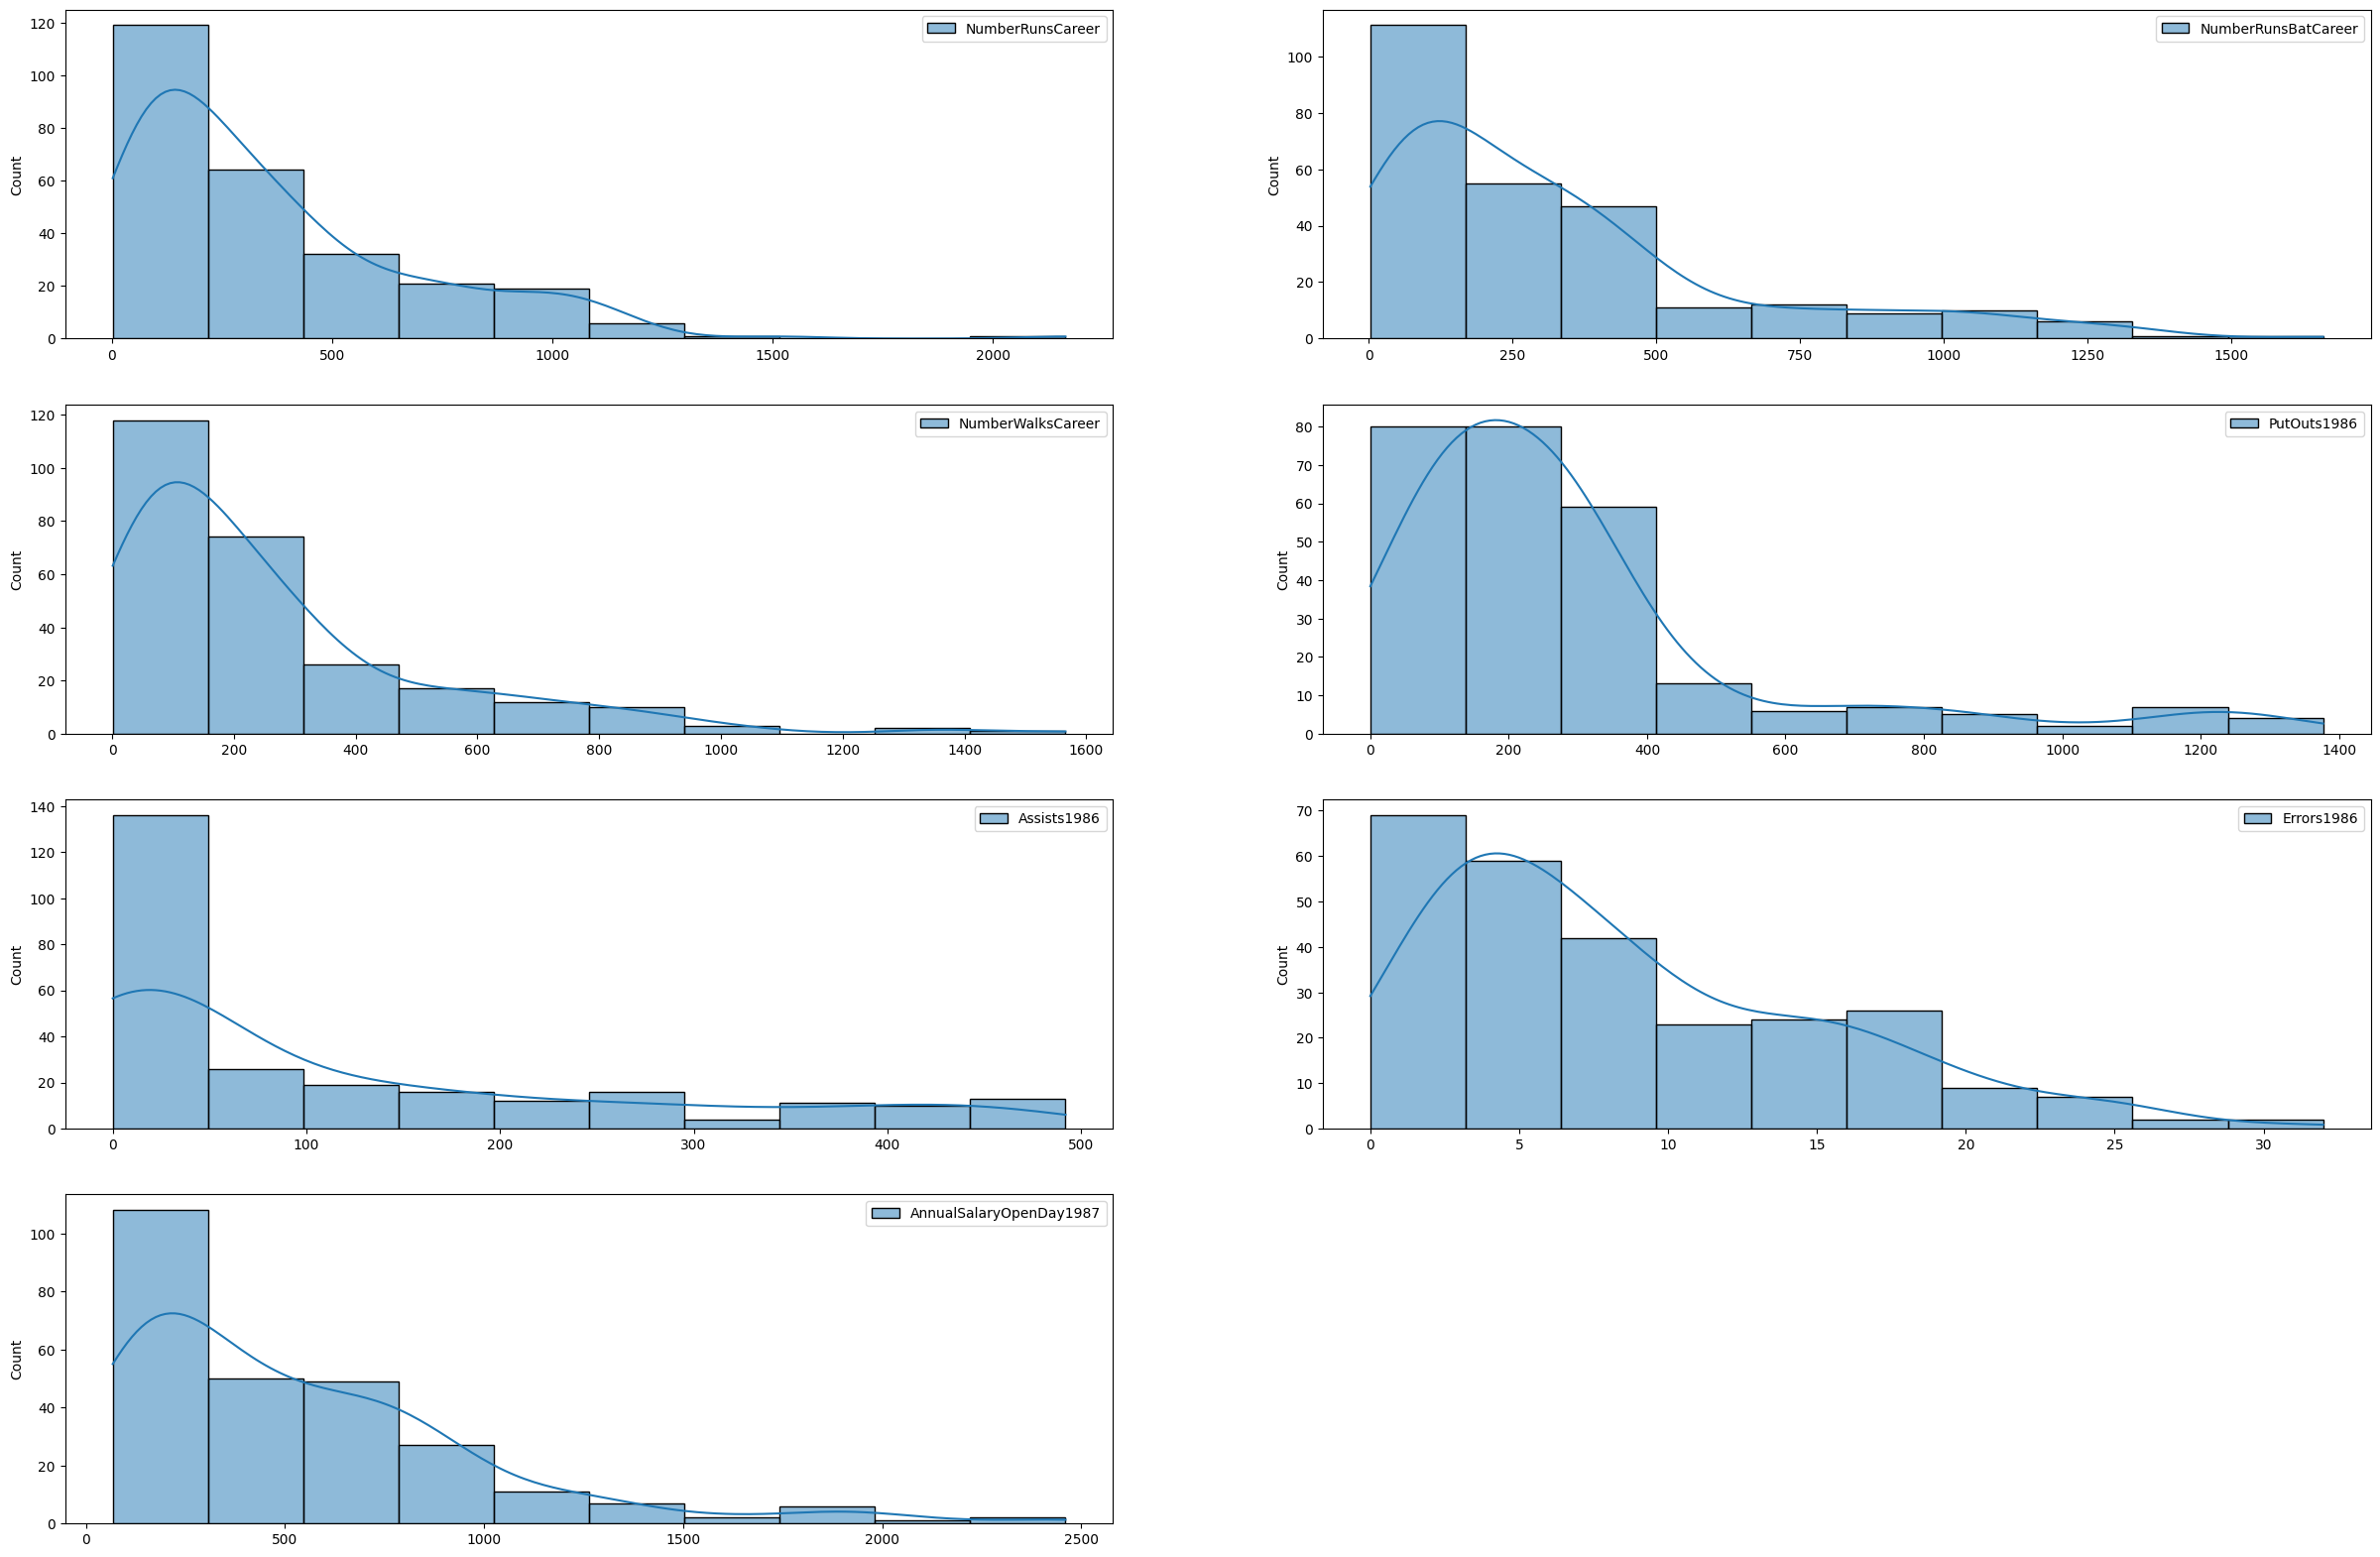

In [12]:
plt.figure(figsize=(30,25))
for i,col in enumerate(numerical_ft_2,1):
    plt.subplot(5,2,i)
    sns.histplot(hitters_copy[col],kde=True,bins = 10)

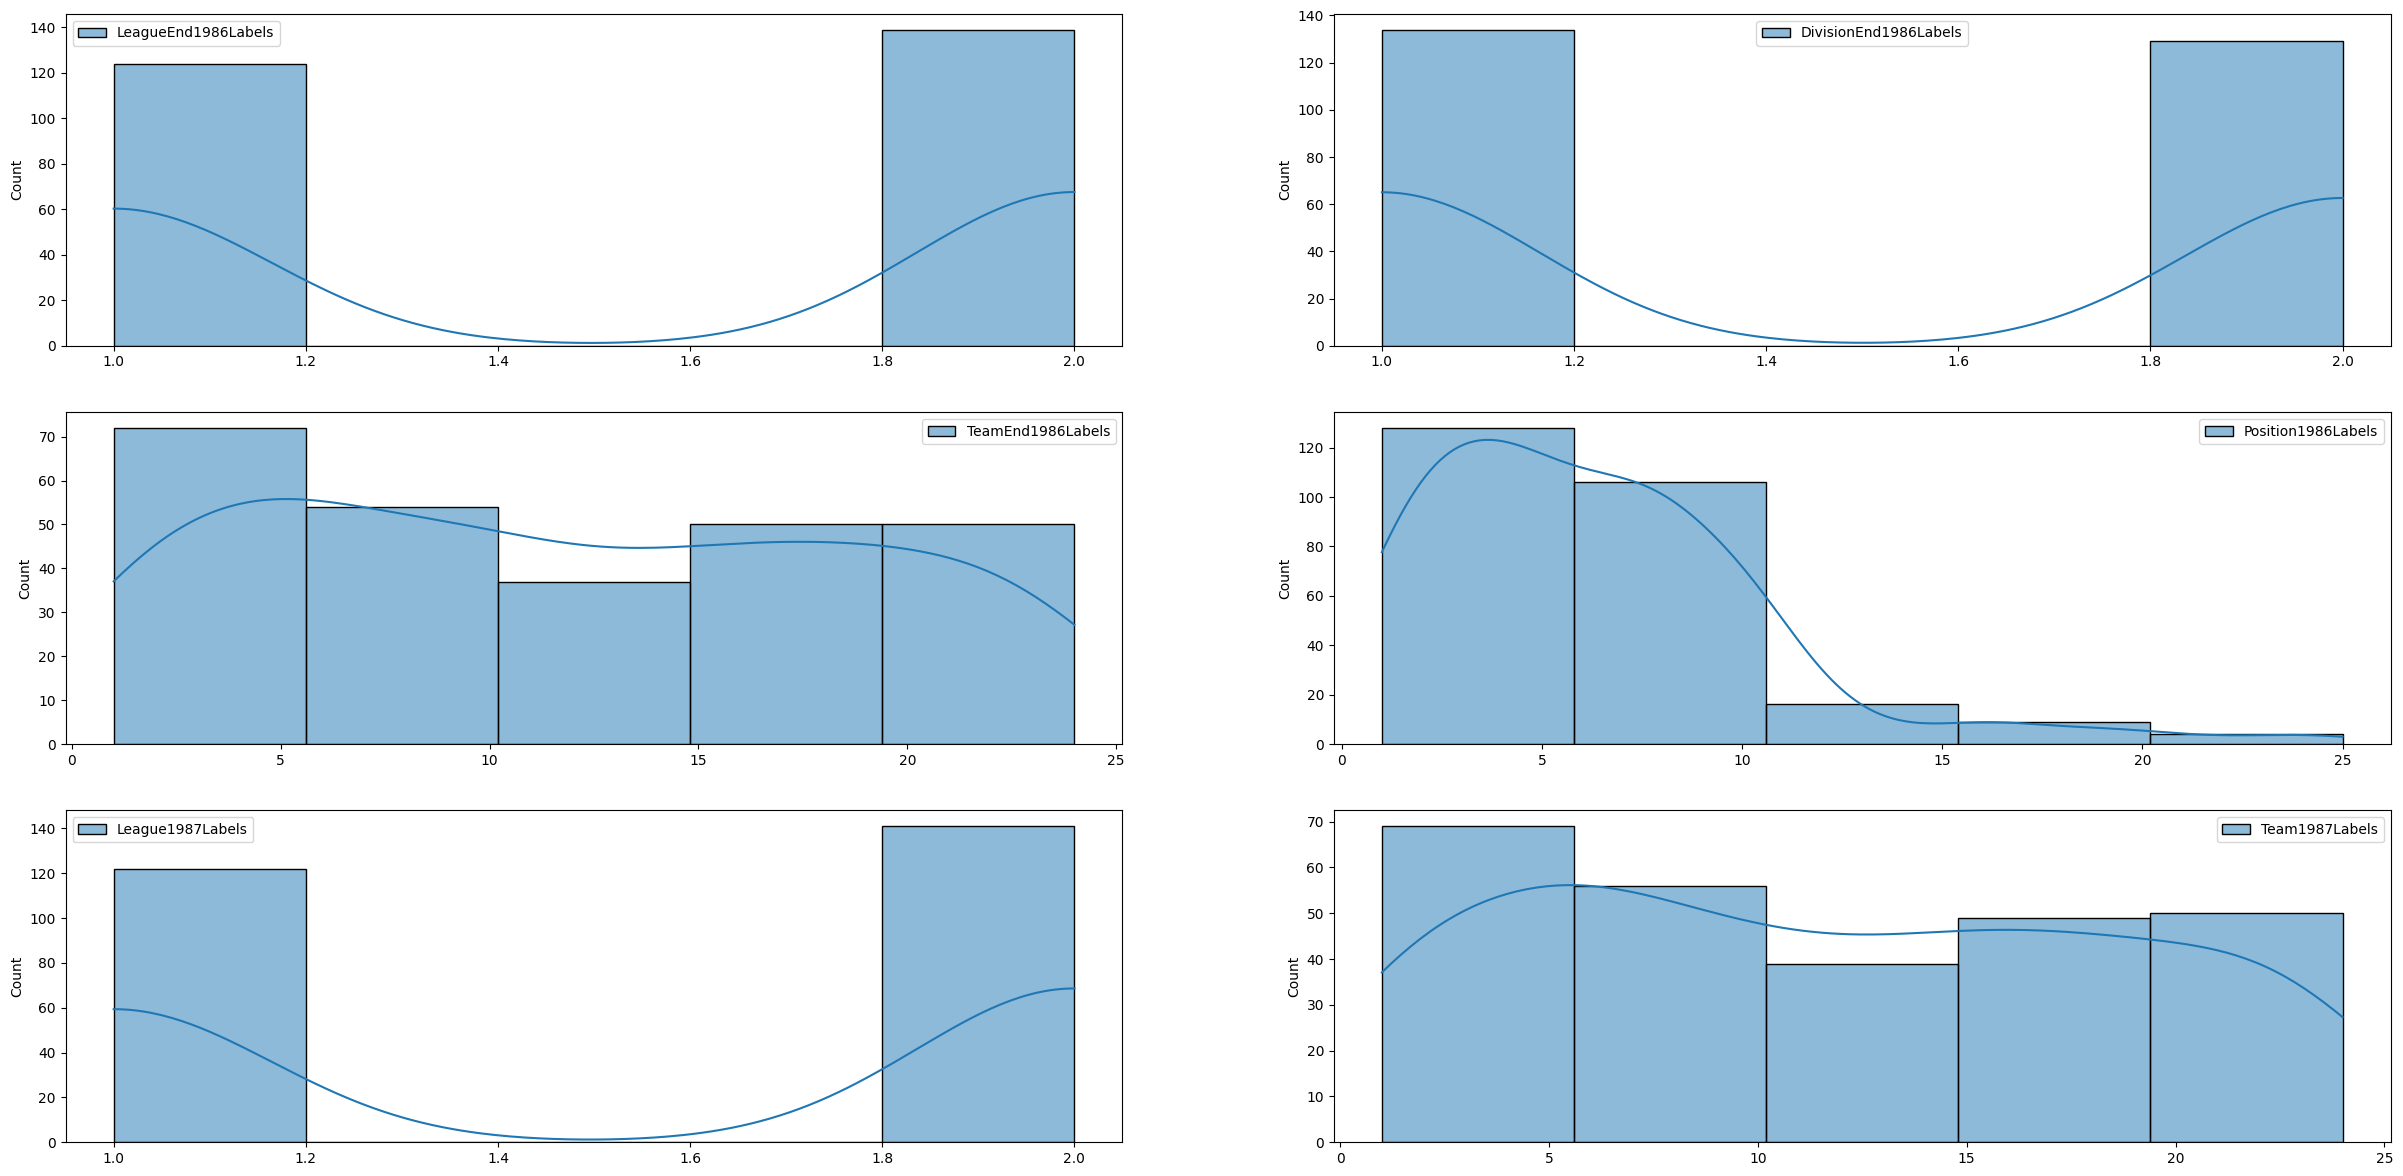

In [13]:
plt.figure(figsize=(30,25))
for i,col in enumerate(numerical_ft_3,1):
    plt.subplot(5,2,i)
    sns.histplot(hitters_copy[col],kde=True,bins = 5)

We observe that the salaries are right sqewed explaining that there are few high paid players and presense of strong outliers.
This pattern is also observed in overall career performance variables. So we shall remove the potential outliers. We choose the IQR method as mean is affected by outliers.

We observe most of career metric are sqewed to the right this is expected so we go about applying log transform on the careeer metrics so that it is normally distributed

/Users/bhargavcn/NEU_Projects/baseball-performance-analysis/venv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/bhargavcn/NEU_Projects/baseball-performance-analysis/venv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/bhargavcn/NEU_Projects/baseball-performance-analysis/venv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/bhargavcn/NEU_Projects/baseball-performance-analysis/venv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/bhargavcn/NEU_Projects/baseball-performance-analysis/venv/lib/python3.11/site-package

<Axes: >

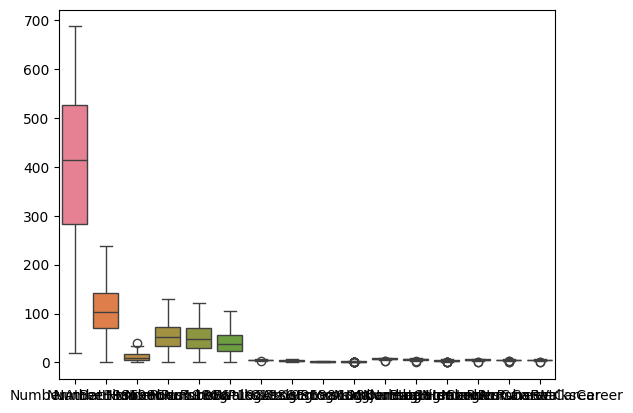

In [14]:


hitters_copy = hitters_copy.assign(C=lambda row: (10*row["Errors1986"])/(row["PutOuts1986"]-row["Assists1986"]-0.1))
q1 = hitters_copy['AnnualSalaryOpenDay1987'].quantile(0.25)
q3 = hitters_copy['AnnualSalaryOpenDay1987'].quantile(0.75)
iqr = q3 - q1

performance_columns_1986 = [
    "NumberAtBat1986",'NumberHits1986', 'NumberHomeRuns1986', 'NumberRuns1986', 'NumberRunsBat1986', 'NumberWalks1986', 'PutOuts1986', 'Assists1986', 'Errors1986',
]
career_performance_columns_1986 = [
    'YearsMajorleag', 'NumberBatCareer', 'NumberHitsCareer', 'NumberHomeRunsCareer', 'NumberRunsCareer', 'NumberRunsBatCareer', 'NumberWalksCareer',
]
non_performance_columns = [
    'LeagueEnd1986Labels', 'DivisionEnd1986Labels', 'TeamEnd1986Labels', 'Position1986Labels', 'League1987Labels', 'Team1987Labels', 
]
target_column = ['AnnualSalaryOpenDay1987']

hitters_copy["logsalary"] = np.log(hitters_copy['AnnualSalaryOpenDay1987'])
for col in career_performance_columns_1986:
  hitters_copy["Log"+col] = np.log(hitters_copy[col])
for col in performance_columns_1986:
  hitters_copy["Log"+col] = np.log(hitters_copy[col])

performance_columns_1986 = [
    "NumberAtBat1986",'NumberHits1986', 'NumberHomeRuns1986', 'NumberRuns1986', 'NumberRunsBat1986', 'NumberWalks1986', 'LogPutOuts1986', 'LogAssists1986', 'LogErrors1986',
]
career_performance_columns_1986 = [
    'LogYearsMajorleag', 'LogNumberBatCareer', 'LogNumberHitsCareer', 'LogNumberHomeRunsCareer', 'LogNumberRunsCareer', 'LogNumberRunsBatCareer', 'LogNumberWalksCareer',
]





sns.boxplot(data=hitters_copy[performance_columns_1986 + career_performance_columns_1986])

# sns.boxplot(x='Assists1986',data =hitters_copy, ax=axarr[3][1])
# sns.boxplot(x='Errors1986',data =hitters_copy, ax=axarr[4][0])
# sns.boxplot(x='PutOuts1986',data =hitters_copy, ax=axarr[4][1])
#hitters_copy["2*errors/(putout-assist)"] = hitters_copy.apply(calculate_new_value, axis=1)


<Axes: >

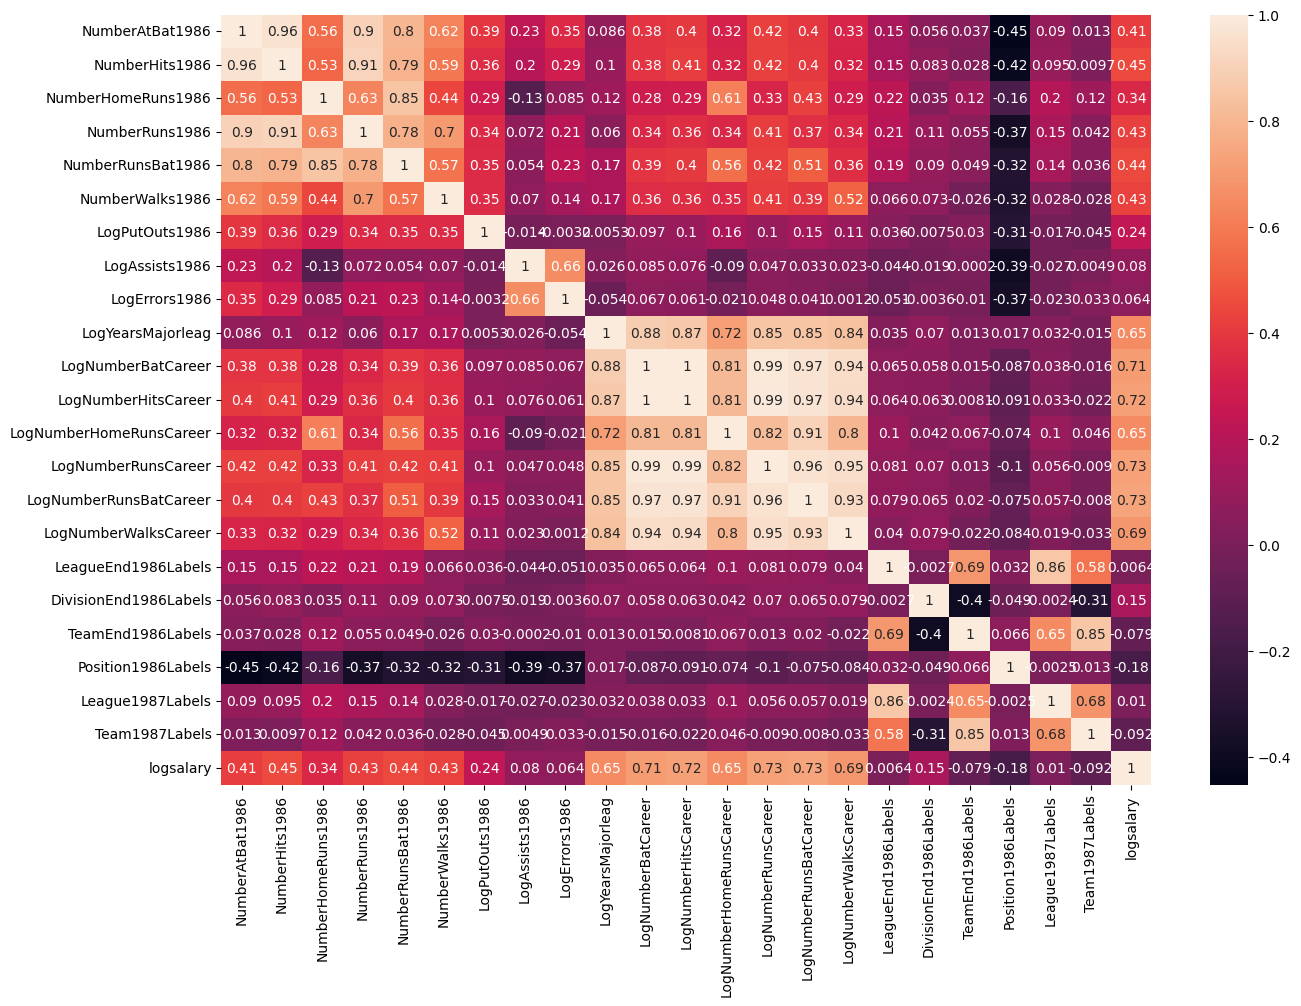

In [15]:
plt.figure(figsize=(15,10))

sns.heatmap(hitters_copy[[*performance_columns_1986, *career_performance_columns_1986, *non_performance_columns, "logsalary"]].corr(),annot = True)

The correlation matrix has the first few features which are performance in 1986, then overall career performance and finally the external factors like team. We are interested in the first overall performance and 1986 perfromance, against salary.
Correlations: 
Highest Positive correlation is with overall career performance metrics
High correlation also exists between the performance in 1986 with highest among them explained by Number of runs batted

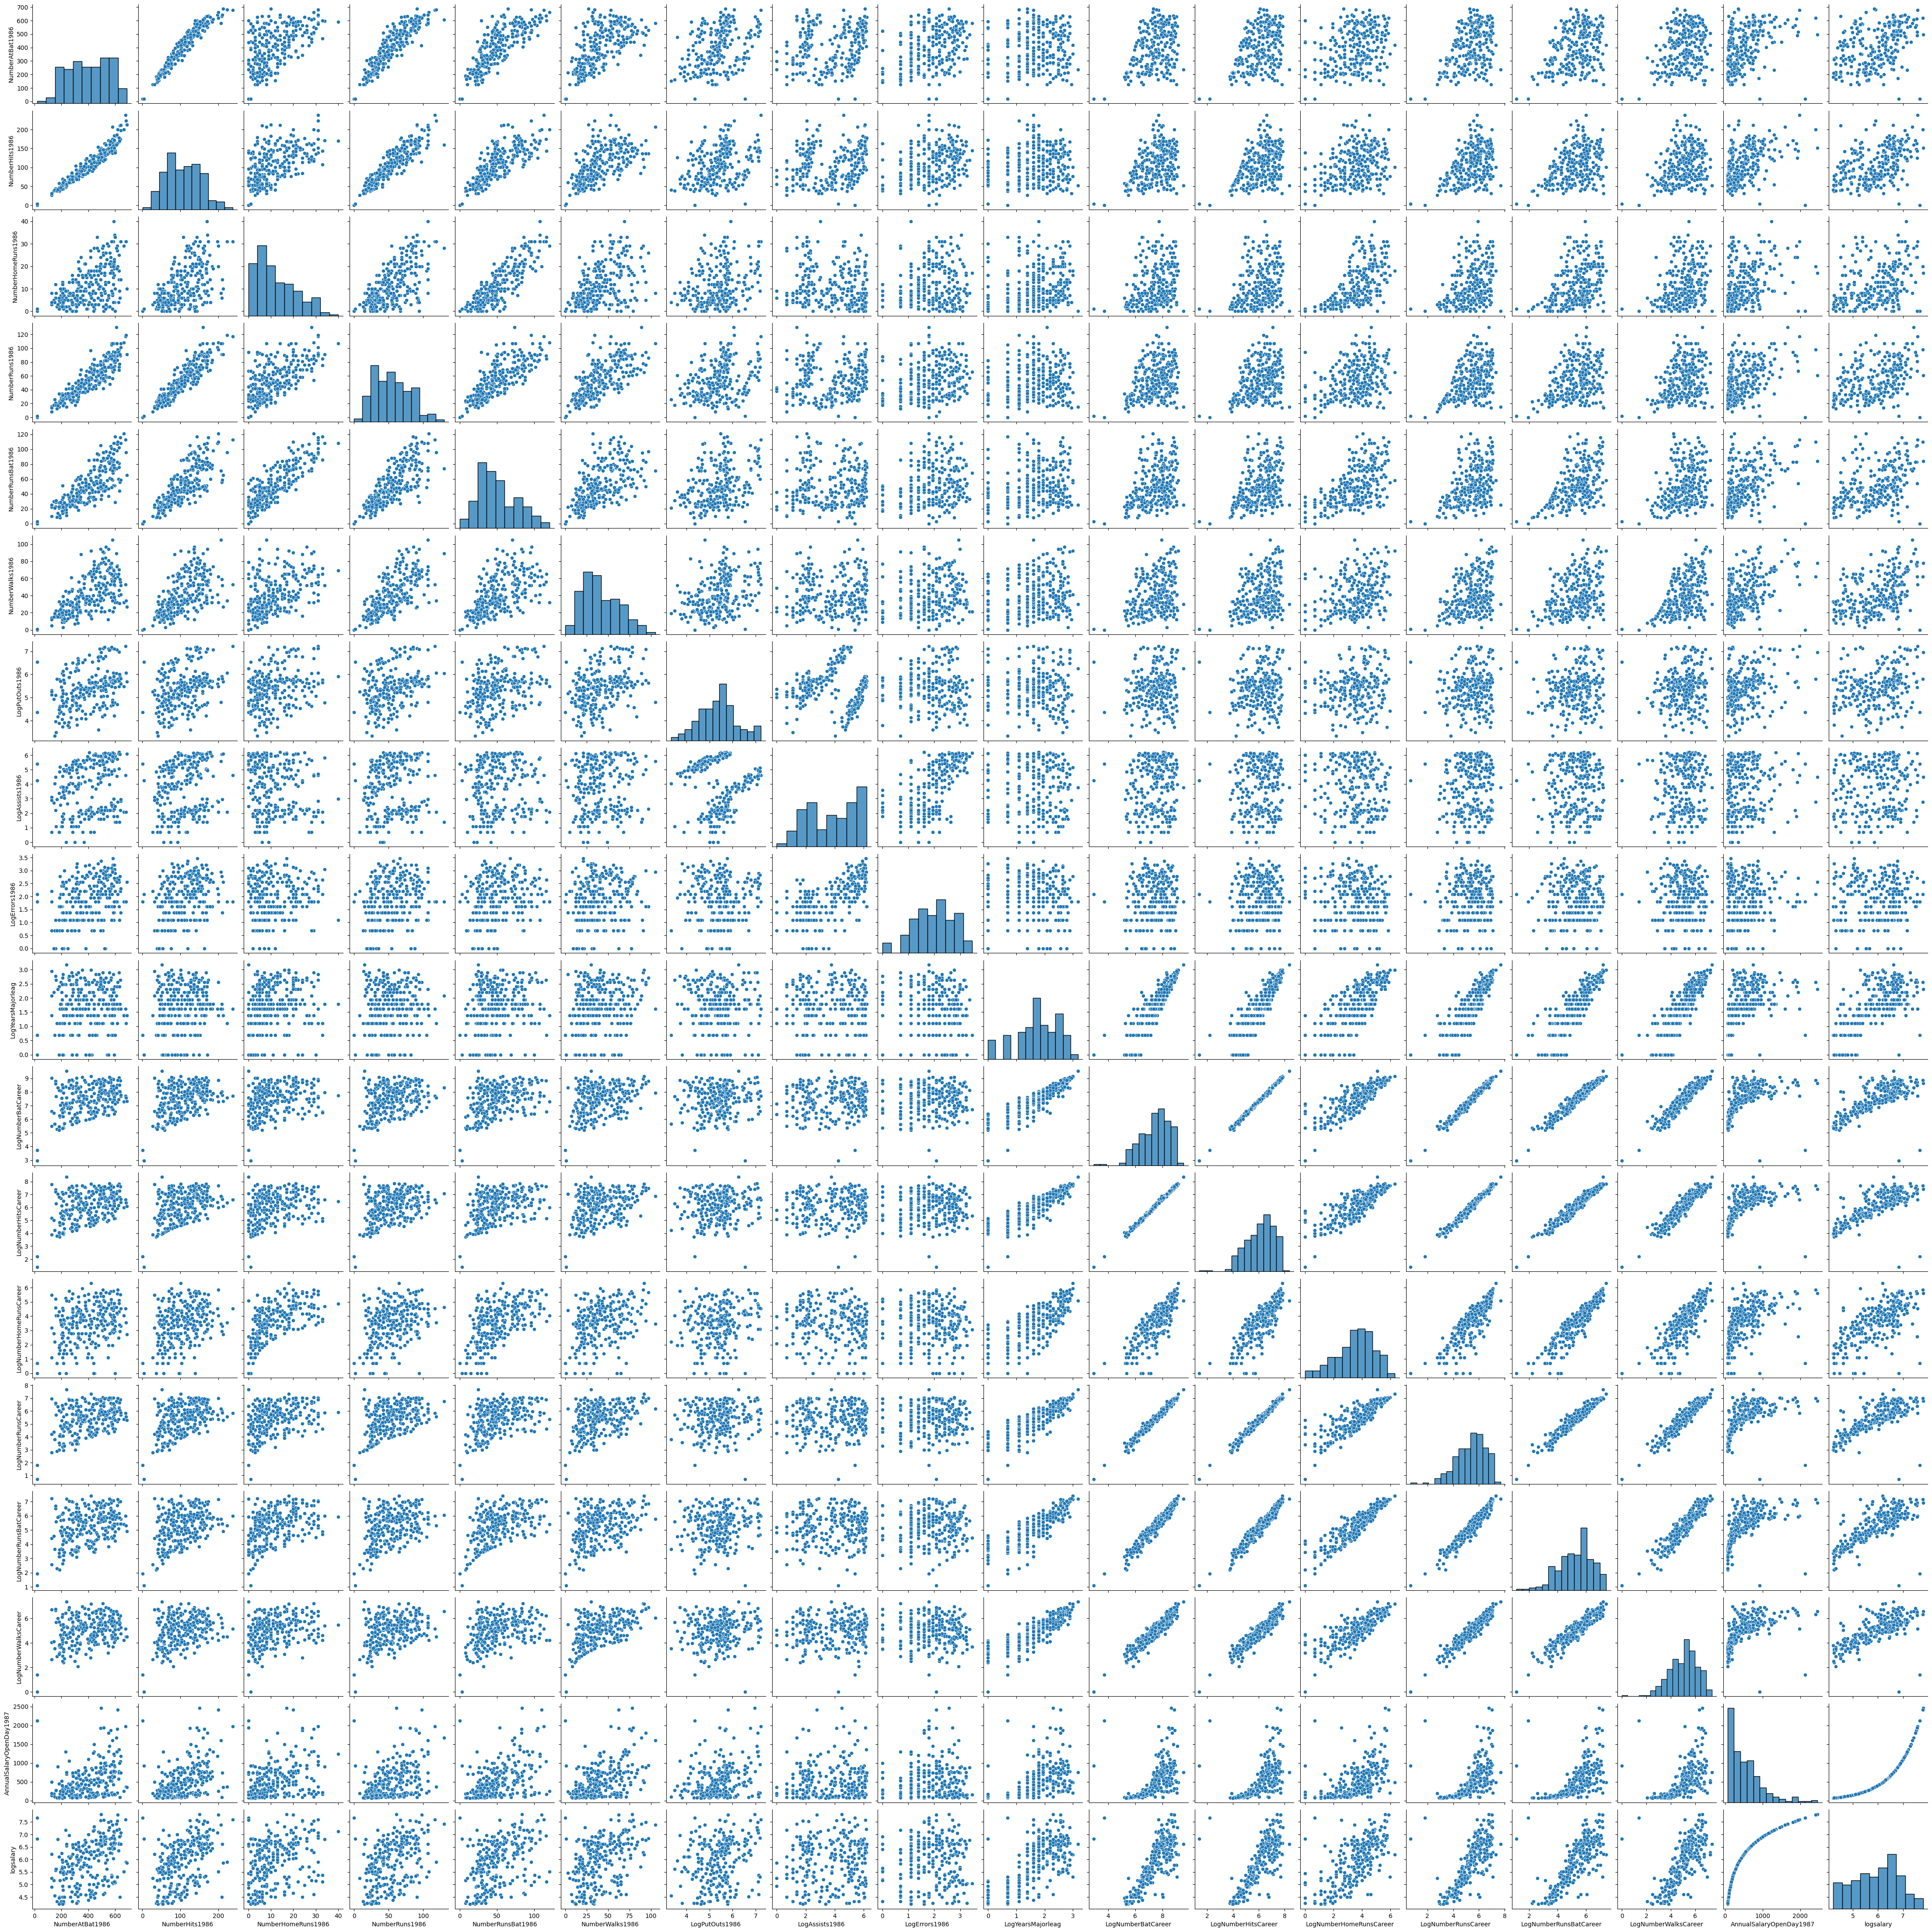

In [16]:
target_column = ['logsalary']

#  To understand relationship between variables
sns.pairplot(hitters_copy[[*performance_columns_1986, *career_performance_columns_1986, "AnnualSalaryOpenDay1987" , *target_column]])


We see the distribution of annual salary is right sqewed we can ignore few values by this is expected that there are few top paid, so instead we apply log transformation and see.
So the boxplot for the log values show that the distribution is good and also there is better correlation values in heatmap. So we go ahead with log values.
(LogNumberBatCareer, LogNumberHitsCareer)(corr 1), LogNumberRunsCareer, LogNumberRunsBatCareer, LogNumber Walks Career
NumberHits1986, NumberRunsBat1986, NumberAtBat1986
These are top correlated so we try to analyze by visualization besides charts side by side.

In [17]:
top_n = int(len(hitters_copy) * 0.1)

top_10_percent = hitters_copy.nlargest(top_n, ['AnnualSalaryOpenDay1987']) 

# Most values have count > 10 below
# vc = hitters_copy["AnnualSalaryOpenDay1987"].value_counts()
# vc[vc <= 1].value_counts()

<Axes: xlabel='Team1987Labels', ylabel='count'>

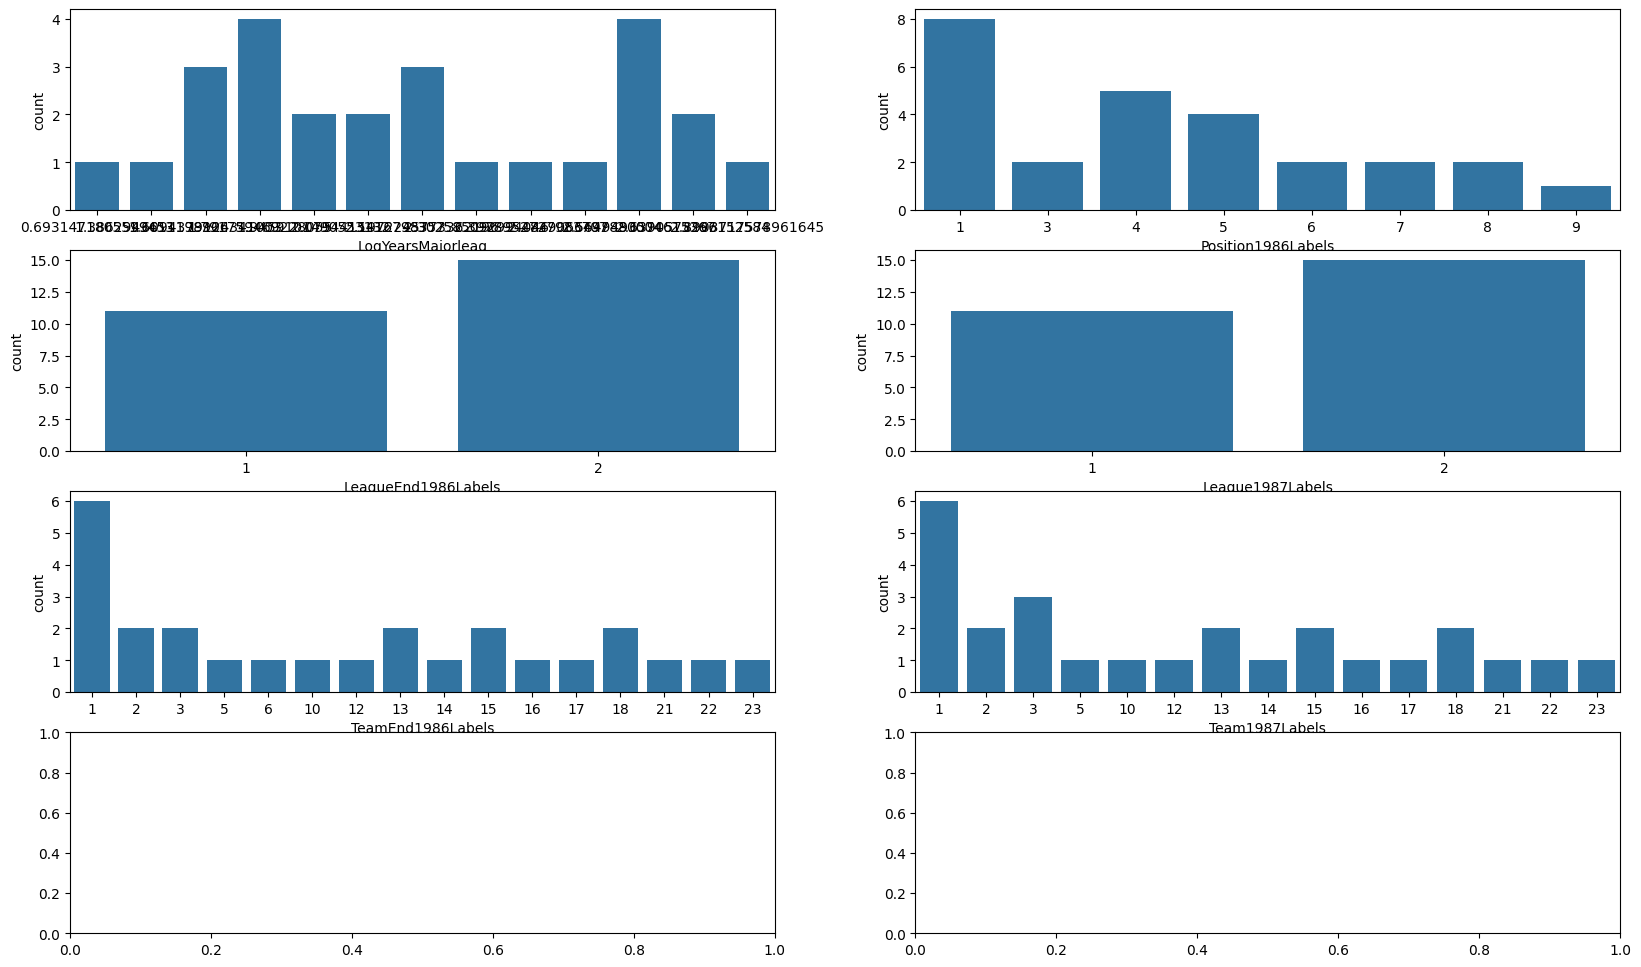

In [18]:
fig, axarr = plt.subplots(4, 2, figsize=(20, 12))

# Plot a count plot of 'country' vs. 'churn' with 'churn' as hue, showing distribution for each country
# (NumberBatCareer, NumberHitsCareer)(corr 1), NumberRunsCareer, NumberRunsBatCareer, Number Walks Career
# NumberHits1986, NumberRunsBat1986, NumberAtBat1986
['YearsMajorleag', 'LeagueEnd1986Labels', 'DivisionEnd1986Labels', 'TeamEnd1986Labels', 'Position1986Labels', 'League1987Labels', 'Team1987Labels']
sns.countplot(x='LogYearsMajorleag', data=top_10_percent, ax=axarr[0][0])
sns.countplot(x='Position1986Labels', data=top_10_percent, ax=axarr[0][1])
sns.countplot(x='LeagueEnd1986Labels', data=top_10_percent, ax=axarr[1][0])
sns.countplot(x='League1987Labels', data=top_10_percent, ax=axarr[1][1])
sns.countplot(x='TeamEnd1986Labels', data=top_10_percent, ax=axarr[2][0])
sns.countplot(x='Team1987Labels', data=top_10_percent, ax=axarr[2][1])

# Above shows that 1 person moved from team 6 to team 3



In logsalary we see value from 4 to 8 so we can make 4 categories of salary pay
4-5- Low
5-6 - Medium
6-7 - High
7-8 - Top Paid

In [19]:
def sal_cat(x):
  if x < 5:
    return "Low"
  elif 5 <= x < 6:
    return "Medium"
  elif 6 <= x < 7:
    return "High"
  else:
    return "Top"

hitters_copy["Salary category"] = hitters_copy["logsalary"].transform(sal_cat)


<Axes: xlabel='Team1987Labels', ylabel='count'>

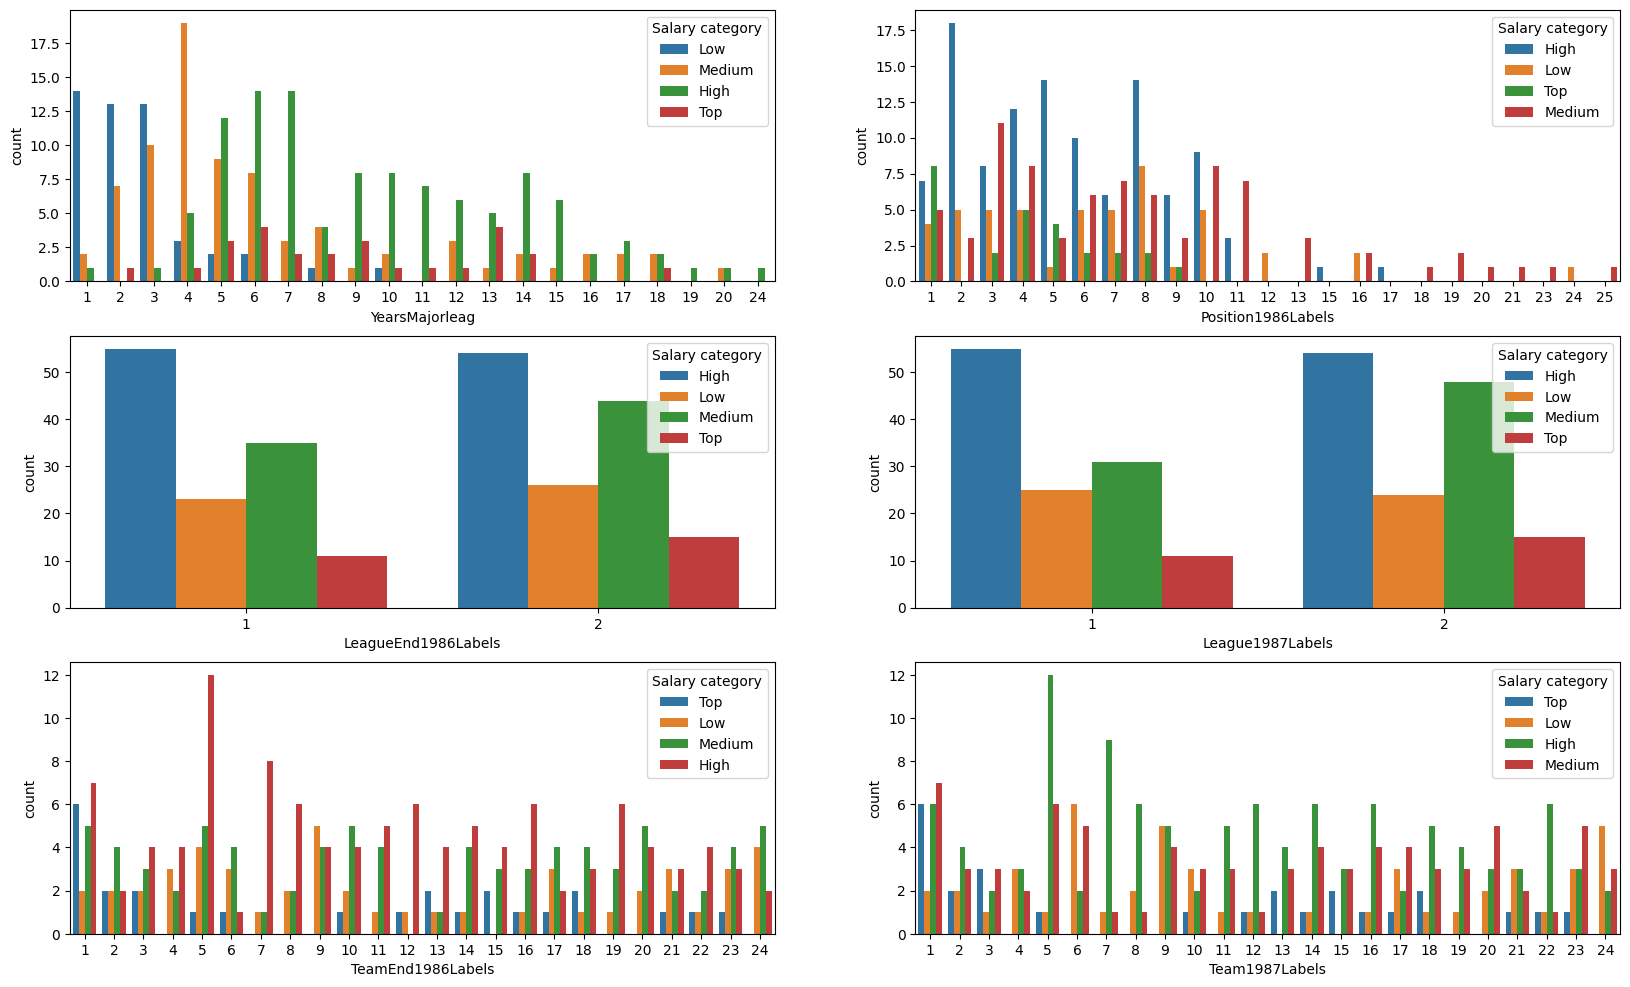

In [20]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))

# Plot a count plot of 'country' vs. 'churn' with 'churn' as hue, showing distribution for each country
# (NumberBatCareer, NumberHitsCareer)(corr 1), NumberRunsCareer, NumberRunsBatCareer, Number Walks Career
# NumberHits1986, NumberRunsBat1986, NumberAtBat1986
['LogYearsMajorleag', 'LeagueEnd1986Labels', 'DivisionEnd1986Labels', 'TeamEnd1986Labels', 'Position1986Labels', 'League1987Labels', 'Team1987Labels']
sns.countplot(x='YearsMajorleag', hue="Salary category", data=hitters_copy, ax=axarr[0][0])
sns.countplot(x='Position1986Labels', hue="Salary category", data=hitters_copy, ax=axarr[0][1])
sns.countplot(x='LeagueEnd1986Labels', hue="Salary category", data=hitters_copy, ax=axarr[1][0])
sns.countplot(x='League1987Labels', hue="Salary category", data=hitters_copy, ax=axarr[1][1])
sns.countplot(x='TeamEnd1986Labels',hue="Salary category", data=hitters_copy, ax=axarr[2][0])
sns.countplot(x='Team1987Labels',hue="Salary category", data=hitters_copy, ax=axarr[2][1])




In [21]:
top_10_percent_runs_career = hitters_copy.nlargest(top_n, ['NumberHits1986']) 
top_10_percent_runs_1986 = hitters_copy.nlargest(top_n, ['LogNumberHitsCareer']) 

<Axes: xlabel='Team1987Labels', ylabel='count'>

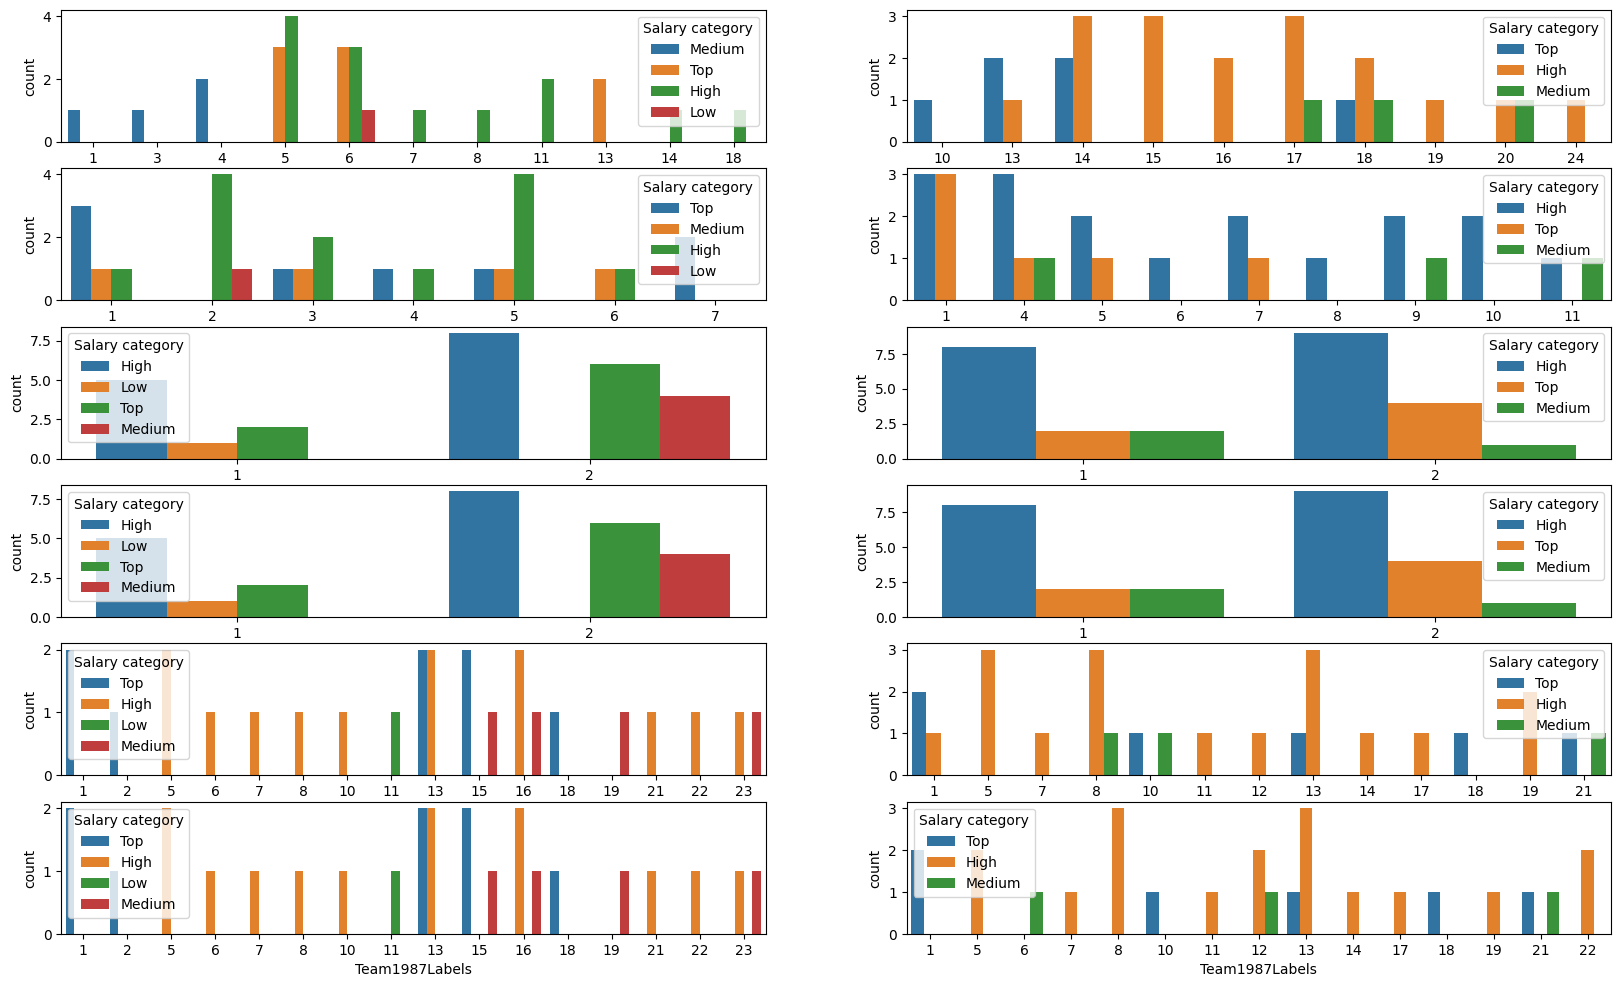

In [22]:
fig, axarr = plt.subplots(6, 2, figsize=(20, 12))
sns.countplot(x='YearsMajorleag', hue="Salary category", data=top_10_percent_runs_career, ax=axarr[0][0])
sns.countplot(x='YearsMajorleag', hue="Salary category", data=top_10_percent_runs_1986, ax=axarr[0][1])
sns.countplot(x='Position1986Labels', hue="Salary category", data=top_10_percent_runs_career, ax=axarr[1][0])
sns.countplot(x='Position1986Labels', hue="Salary category", data=top_10_percent_runs_1986, ax=axarr[1][1])
sns.countplot(x='LeagueEnd1986Labels', hue="Salary category", data=top_10_percent_runs_career, ax=axarr[2][0])
sns.countplot(x='LeagueEnd1986Labels', hue="Salary category", data=top_10_percent_runs_1986, ax=axarr[2][1])
sns.countplot(x='League1987Labels', hue="Salary category", data=top_10_percent_runs_career, ax=axarr[3][0])
sns.countplot(x='League1987Labels', hue="Salary category", data=top_10_percent_runs_1986, ax=axarr[3][1])
sns.countplot(x='TeamEnd1986Labels',hue="Salary category", data=top_10_percent_runs_career, ax=axarr[4][0])
sns.countplot(x='TeamEnd1986Labels',hue="Salary category", data=top_10_percent_runs_1986, ax=axarr[4][1])
sns.countplot(x='Team1987Labels',hue="Salary category", data=top_10_percent_runs_career, ax=axarr[5][0])
sns.countplot(x='Team1987Labels',hue="Salary category", data=top_10_percent_runs_1986, ax=axarr[5][1])


Last two boxes show that there is a shift in players for top 10% of the runs scored in previous season, We see first that low paid players are not in top 10% of runs scorers and secondly we see that there is a team shift for the top 10% hitters based on last season rather than thier career. We have enough data we shall go build prediction model.

/var/folders/_g/pnkjprqj7z3d7wwtd6jwl2fc0000gn/T/ipykernel_46470/1069854431.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.replace([np.inf, -np.inf], np.nan, inplace=True)


                                 OLS Regression Results                                
Dep. Variable:              logsalary   R-squared (uncentered):                   0.592
Model:                            OLS   Adj. R-squared (uncentered):              0.572
Method:                 Least Squares   F-statistic:                              30.01
Date:                Sun, 01 Dec 2024   Prob (F-statistic):                    1.02e-41
Time:                        00:18:02   Log-Likelihood:                         -252.31
No. Observations:                 260   AIC:                                      528.6
Df Residuals:                     248   BIC:                                      571.4
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

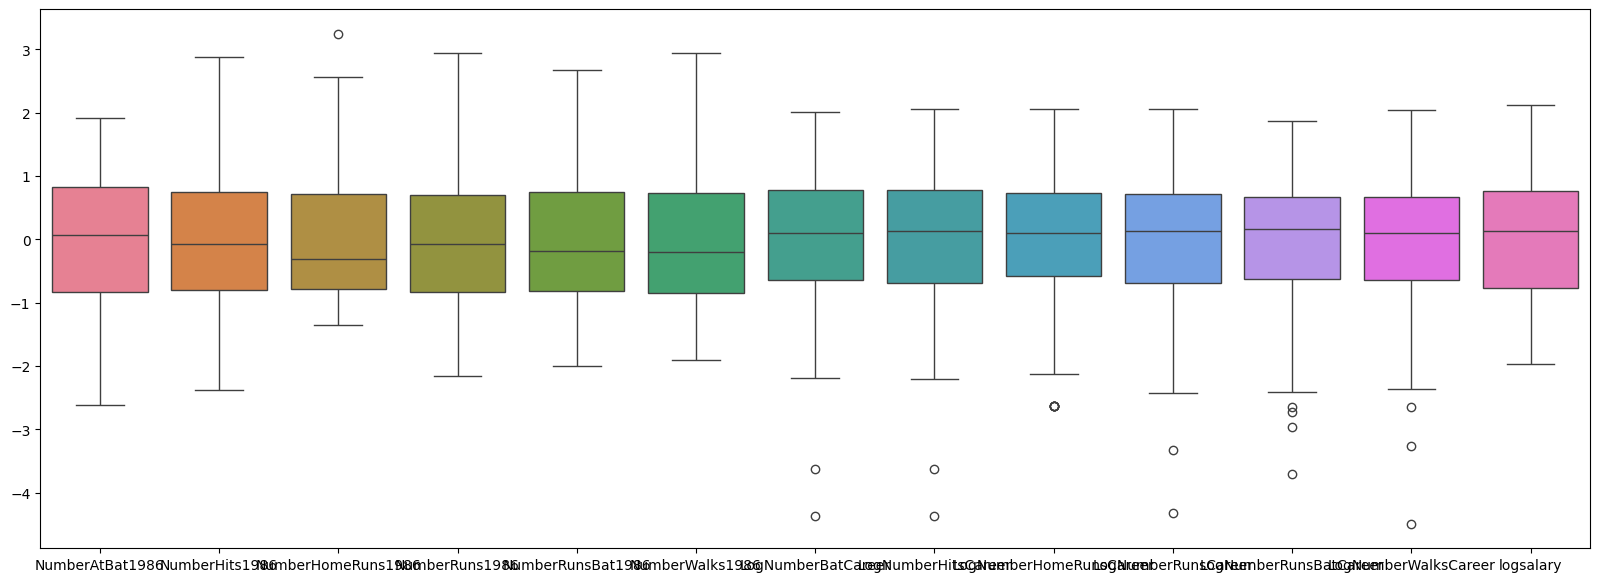

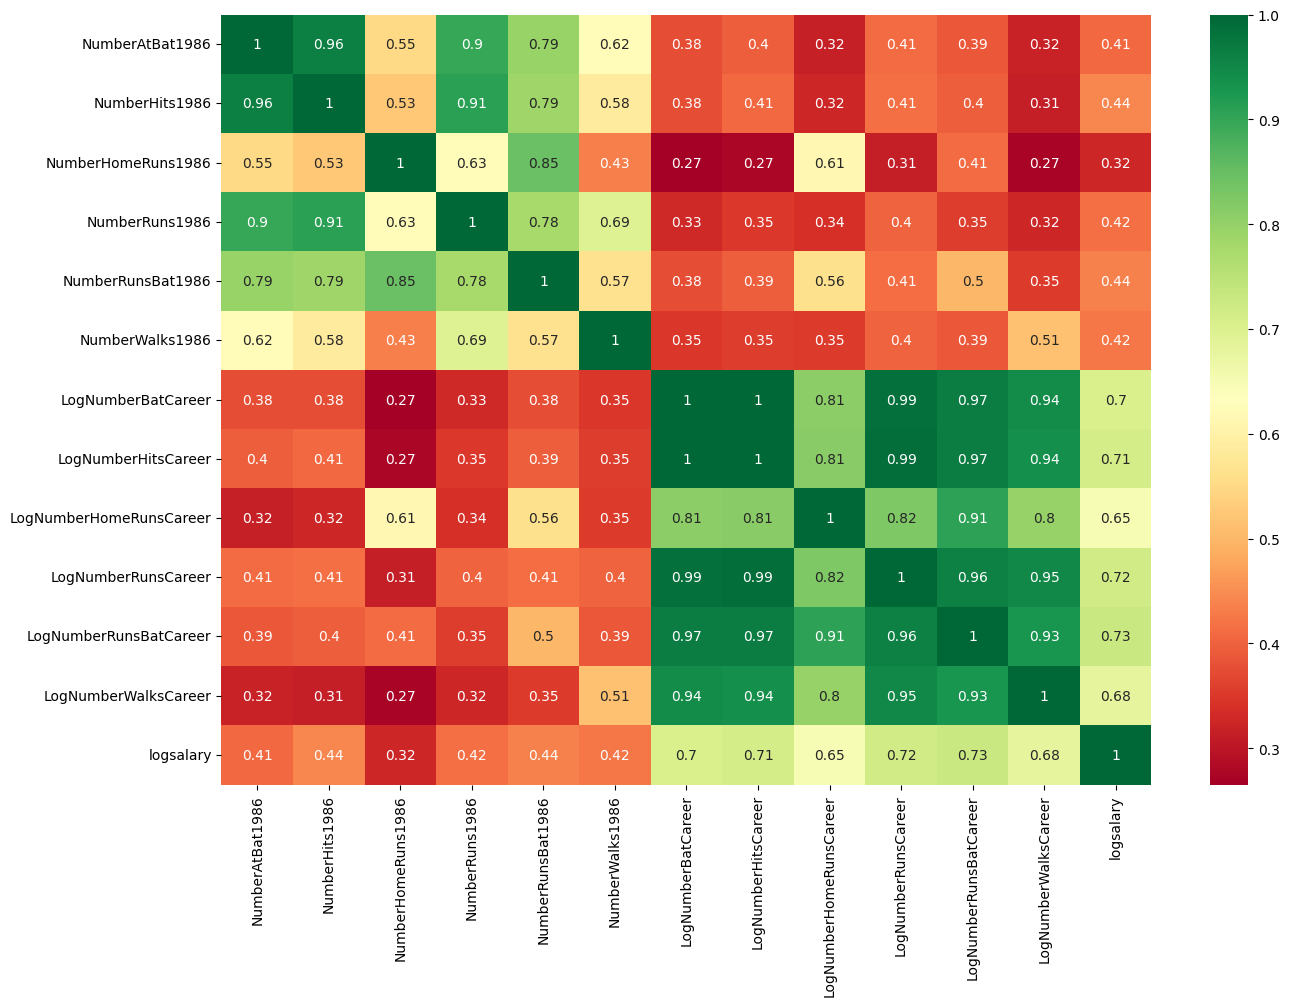

In [23]:
from sklearn.preprocessing import StandardScaler



scaler = StandardScaler()


cols = performance_columns_1986+career_performance_columns_1986+target_column
cols.remove("LogYearsMajorleag")
cols.remove('LogPutOuts1986')
cols.remove('LogAssists1986')
cols.remove('LogErrors1986')
final_df = hitters_copy[cols]
final_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values (which replaced infinities)
final_df = final_df.dropna()

final_df.isin([np.inf, -np.inf]).sum().sum()




X = final_df
X[cols] = scaler.fit_transform(X)



plt.figure(figsize=(20,7))
sns.boxplot(data = X)
cols.remove("logsalary")

plt.figure(figsize=(15,10))
sns.heatmap(X.corr(),annot = True,cmap="RdYlGn")


model = sm.OLS(X["logsalary"], X[cols])
results = model.fit()
print(results.summary())

In [24]:
signifanct_cols = ["NumberAtBat1986", "NumberHits1986", "LogNumberRunsBatCareer",  "LogNumberWalksCareer"]
target_column = ["logsalary"]




model = sm.OLS(X[target_column[0]], X[signifanct_cols])
results = model.fit()
print(results.summary())

# Remove log number walks career as it has no significance
signifanct_cols.remove("LogNumberWalksCareer")

                                 OLS Regression Results                                
Dep. Variable:              logsalary   R-squared (uncentered):                   0.567
Model:                            OLS   Adj. R-squared (uncentered):              0.560
Method:                 Least Squares   F-statistic:                              83.88
Date:                Sun, 01 Dec 2024   Prob (F-statistic):                    2.04e-45
Time:                        00:18:02   Log-Likelihood:                         -260.05
No. Observations:                 260   AIC:                                      528.1
Df Residuals:                     256   BIC:                                      542.3
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

We are concerned about only performance metrics hence we only take performamce releated attributes and Also the number of walks when with selected attributes has less significance so we remove it too.

<Figure size 600x400 with 0 Axes>

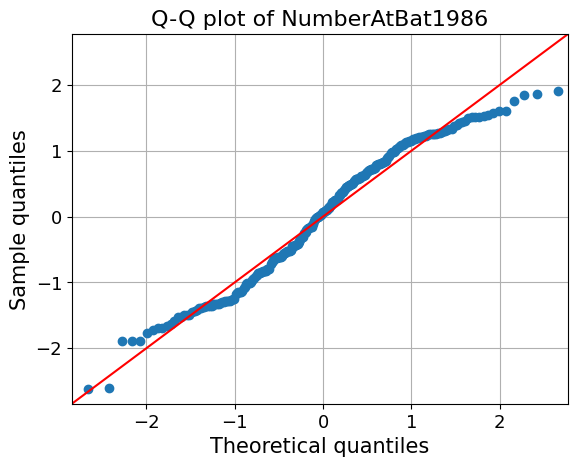

<Figure size 600x400 with 0 Axes>

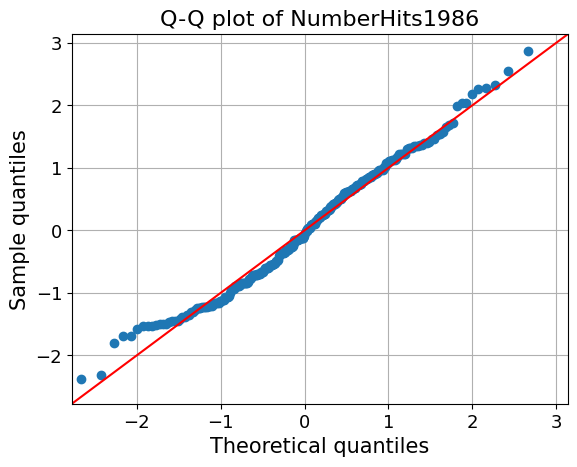

<Figure size 600x400 with 0 Axes>

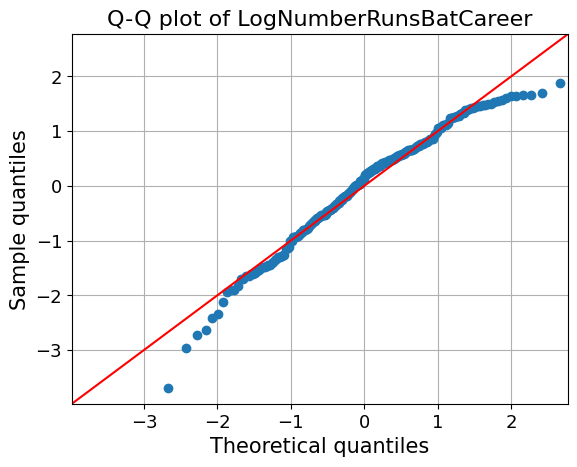

In [25]:
from statsmodels.graphics.gofplots import qqplot
norm_dist_data=X[signifanct_cols]
for c in norm_dist_data.columns[:]:
  plt.figure(figsize=(6,4))
  fig=qqplot(X[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


X_cols = X[signifanct_cols]
y_cols = X[target_column[0]]

X_train, X_test,y_train, y_test = train_test_split(X_cols,y_cols ,random_state=42,train_size=0.8)

print('X_train : ')
print(X_train.head())
print('')
print('X_test : ')
print(X_test.head())
print('')
print('y_train : ')
print(y_train.head())
print('')
print('y_test : ')
print(y_test.head())

X_train : 
     NumberAtBat1986  NumberHits1986  LogNumberRunsBatCareer
82          1.846012        2.875974                0.618278
308         0.509540        0.082707                0.629216
20          0.055004       -0.360669               -1.255537
75          0.129629        0.237888                0.365067
163         1.445749        2.033560                1.649001

X_test : 
     NumberAtBat1986  NumberHits1986  LogNumberRunsBatCareer
40         -1.518913       -1.491277               -1.700347
230        -0.311339       -0.626695                0.012998
279         0.231391       -0.271994               -1.119464
234         0.217823        0.326563                0.593725
266        -0.155304       -0.161150               -1.135370

y_train : 
82     1.868842
308    0.769339
20    -1.518696
75     0.911469
163    2.096061
Name: logsalary, dtype: float64

y_test : 
40    -1.965018
230    0.690994
279   -1.058268
234    1.358459
266   -1.547446
Name: logsalary, dtype: float64

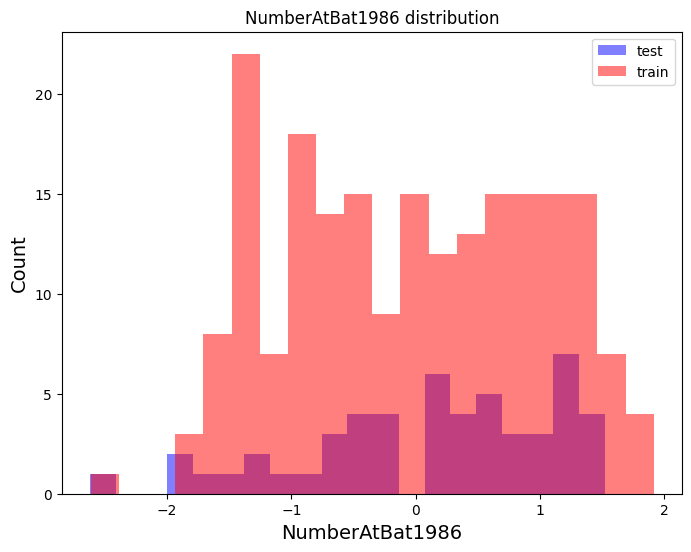

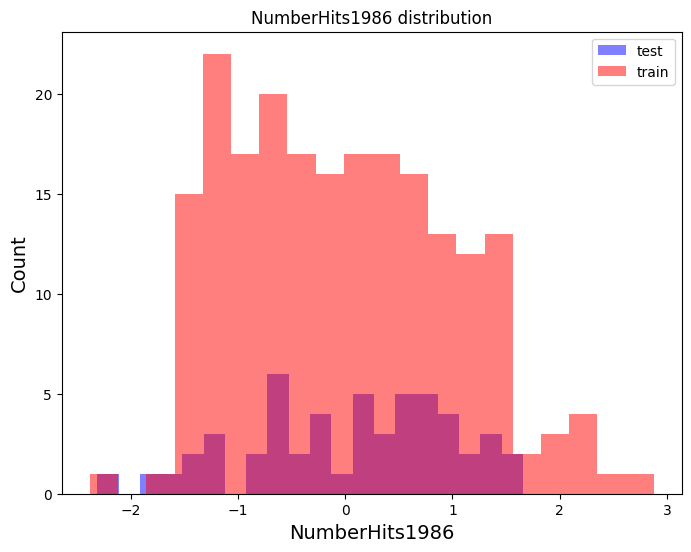

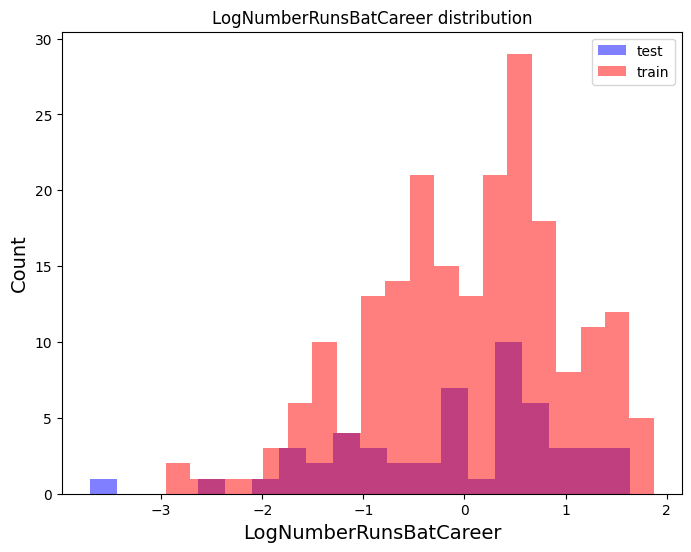

In [27]:
X_test_plot = X_test[signifanct_cols]
X_train_plot = X_train[signifanct_cols]
for col in X_test_plot.columns[:]:
    plt.figure(figsize=(8,6))

    plt.hist(X_test_plot[col], bins=20, alpha=0.5, label="test",color = 'b')
    plt.hist(X_train_plot[col], bins=20, alpha=0.5, label="train",color = 'r')
    plt.xlabel(col, size=14)
    plt.ylabel("Count", size=14)

    plt.legend(loc='upper right')
    plt.title("{} distribution".format(col))
    plt.show()

The intercept b0=  -0.022299122024576845
The coefficient b1=  [-0.2349751   0.41365511  0.70094145]
Training Score: 0.6065934586740567
MAE: 0.5617693526396204
MSE: 0.6483841891670374
RMSE: 0.8052230679551086
R2: 0.4008770606969869


Text(0.5, 1.0, 'Histogram of residuals')

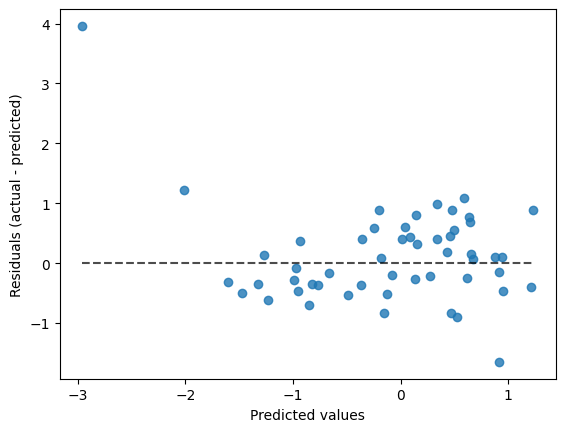

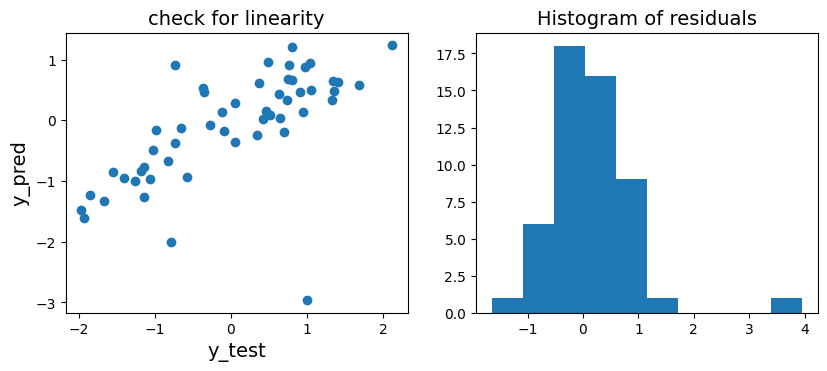

In [28]:
linearModel = LinearRegression()
linearModel.fit(X_train,y_train)




#printing the regression coefficients

print("The intercept b0= ", linearModel.intercept_)

print("The coefficient b1= ", linearModel.coef_)
print(f"Training Score: {linearModel.score(X_train, y_train)}")
predictions = linearModel.predict(X_test)

from sklearn.metrics import PredictionErrorDisplay
from sklearn.metrics import mean_absolute_error, r2_score

display = PredictionErrorDisplay(y_true=y_test, y_pred=predictions)
display.plot()
# Compute metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Display metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
plt.scatter(y_test, predictions)
plt.xlabel('y_test',fontsize=14), plt.ylabel('y_pred',fontsize=14)
plt.title('check for linearity',fontsize=14)
plt.subplot(2,3,2)
plt.hist(y_test - predictions)
plt.title('Histogram of residuals',fontsize=14)



MAE: 0.5611044135131804
MSE: 0.6439531705325194
RMSE: 0.8024669279992288
R2: 0.4049714309064598


Text(0.5, 1.0, 'Q-Q plot')

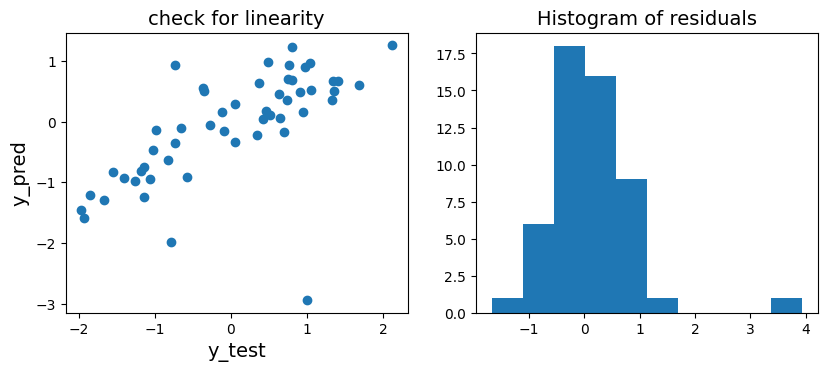

<Figure size 640x480 with 0 Axes>

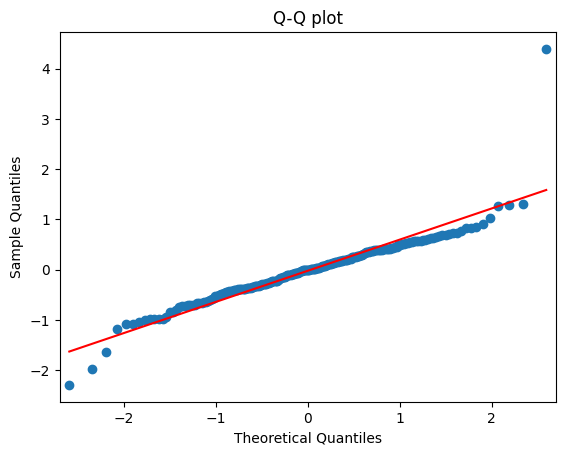

In [29]:
olsModel = sm.OLS(y_train,X_train)
olsFit = olsModel.fit()# print(olsModel_fit.summary())

y_pred = olsFit.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")


plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
plt.scatter(y_test, y_pred)
plt.xlabel('y_test',fontsize=14), plt.ylabel('y_pred',fontsize=14)
plt.title('check for linearity',fontsize=14)
plt.subplot(2,3,2)
plt.hist(y_test - y_pred)
plt.title('Histogram of residuals',fontsize=14)

#qq-plot
plt.figure(num=3)
sm.qqplot(olsFit.resid,line='s')
plt.title("Q-Q plot")

We thus conclude that the above factors are better in predicting the salary but only explain to 40% of the variance in salary.

Now that we know number of times at batting and number of hits taken detremine the salary. How external factors are affecting this performance metrics.
From our understanding we already know that there are few factors like years at major league which affect salary which are correlated to the performance.

In [ ]:
interesting_params = ["NumberHits1986"]
external_factors_columns = [
    'LeagueEnd1986Vals', 'DivisionEnd1986Vals', 'TeamEnd1986Vals', 'Position1986Vals', 'League1987Vals', 'Team1987Vals', 'YearsMajorleag'
]
top_performers = hitters_copy.nlargest(top_n, interesting_params)
topp = top_performers["Hitter"].to_list()
hitters["TopHitters"] = hitters["Hitter"].transform(lambda x: (x in topp))

def transform_labels(map):
  def mapper(val):
    return map[val]
  return mapper
hitters["LeagueEnd1986Vals"] = hitters["LeagueEnd1986"].transform(transform_labels(LEAGUE_MAPPINGS))
hitters["DivisionEnd1986Vals"] = hitters["DivisionEnd1986"].transform(transform_labels(DIVISION_MAPPINGS))
hitters["TeamEnd1986Vals"] = hitters["TeamEnd1986"].transform(transform_labels(TEAM_NAME_MAPPINGS))
hitters["Position1986Vals"] = hitters["Position1986"].transform(transform_labels(PLAYER_POSITION_MAPPINGS))
hitters["League1987Vals"] = hitters["League1987"].transform(transform_labels(LEAGUE_MAPPINGS))
hitters["Team1987Vals"] = hitters["Team1987"].transform(transform_labels(TEAM_NAME_MAPPINGS))
hitters.head()









Hitter  NumberAtBat1986  NumberHits1986  NumberHomeRuns1986  \
0     Andy Allanson              293              66                   1   
1        Alan Ashby              315              81                   7   
2       Alvin Davis              479             130                  18   
3      Andre Dawson              496             141                  20   
4  Andres Galarraga              321              87                  10   

   NumberRuns1986  NumberRunsBat1986  NumberWalks1986  YearsMajorleag  \
0              30                 29               14               1   
1              24                 38               39              14   
2              66                 72               76               3   
3              65                 78               37              11   
4              39                 42               30               2   

   NumberBatCareer  NumberHitsCareer  ...  Position1986Labels  \
0              293                66  ...                   8   
1             3449               835  ...                   8   
2             1624               457  ...                   1   
3             5628              1575  ...                   5   
4              396               101  ...                   1   

   League1987Labels  Team1987Labels  LeagueEnd1986Vals DivisionEnd1986Vals  \
0                 2              16           American                EAST   
1                 1               7           National                WEST   
2                 2              24           American                WEST   
3                 1               5           National                EAST   
4                 1               4           National                EAST   

  TeamEnd1986Vals Position1986Vals League1987Vals  Team1987Vals  TopHitters  
0       Cleveland          Catcher       American     Cleveland       False  
1         Houston          Catcher       National       Houston       False  
2         Seattle       First Base       American       Seattle       False  
3        Montreal      Right Field       National       Chicago       False  
4        Montreal       First Base       National      Montreal       False  

[5 rows x 37 columns]

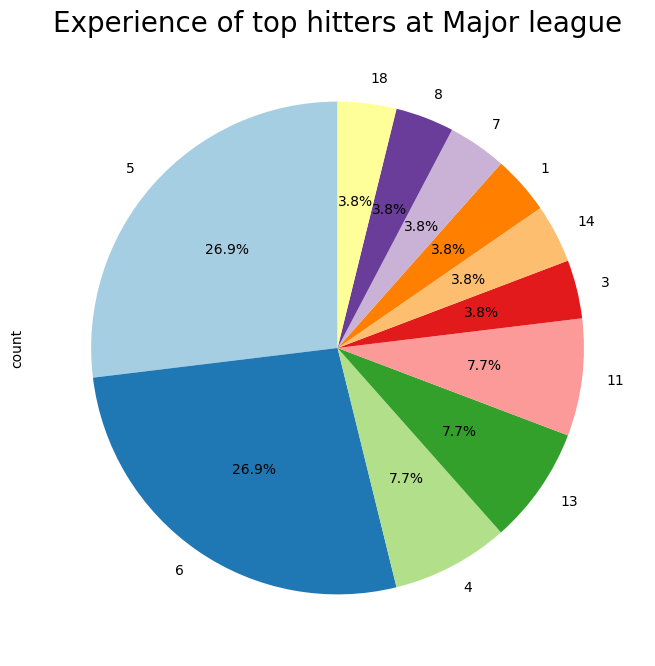

<Axes: xlabel='Count', ylabel='YearsMajorleag'>

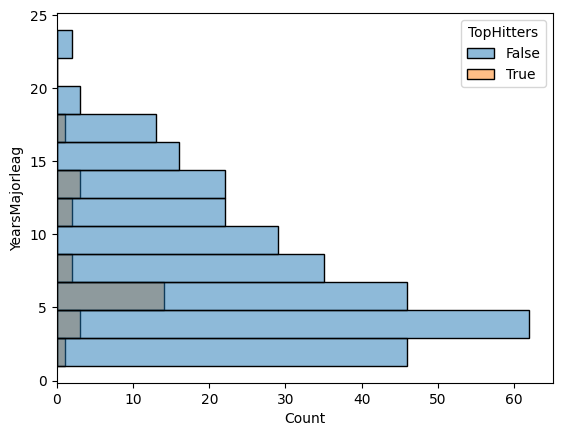

In [51]:
#visualising for categorical variables

counts = top_performers['YearsMajorleag'].value_counts()

plt.figure(figsize=(8, 8))
counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title("Experience of top hitters at Major league", size = 20)
plt.show()
sns.histplot(y='YearsMajorleag', hue="TopHitters", data=hitters)

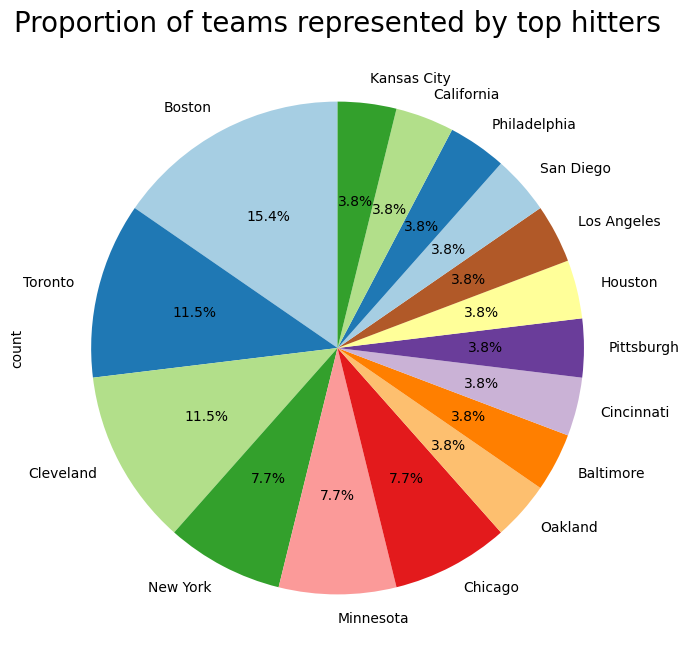

<Axes: xlabel='count', ylabel='TeamEnd1986Vals'>

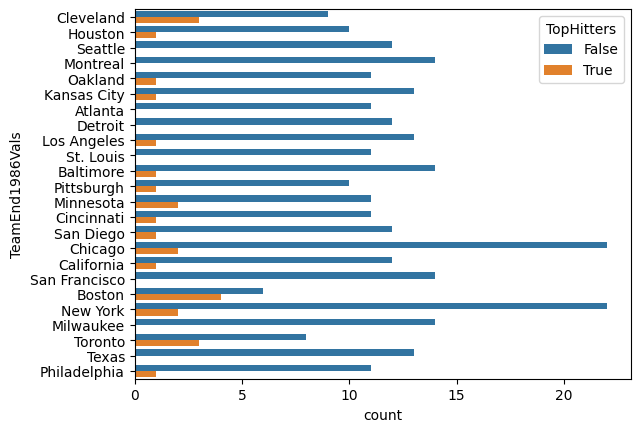

In [47]:
counts = hitters[hitters['TopHitters'] == True]['TeamEnd1986Vals'].value_counts()

plt.figure(figsize=(8, 8))
counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title("Proportion of teams represented by top hitters", size = 20)
plt.show()
# sns.histplot(y='YearsMajorleag', data=top_performers)

hitters["TopHitters"].head()
sns.countplot(y='TeamEnd1986Vals', hue="TopHitters", data=hitters)

In [56]:
from scipy.stats import f_oneway



for factor in external_factors_columns:
  # Perform one-way ANOVA
  groups = [group['NumberHits1986'].values for _, group in hitters.groupby(factor)]
  f_stat, p_value = f_oneway(*groups)
  print(f"Factor: {factor}")
  print(f"F-statistic: {f_stat}")
  print(f"P-value: {p_value}")
  print("*"*10)
  break

Factor: LeagueEnd1986Labels
F-statistic: 3.300468043319057
P-value: 0.07019555463111382
**********


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from itertools import combinations_with_replacement

for factor1, factor2 in combinations_with_replacement(external_factors_columns, 2):
  if factor1 == factor2: continue
  formula = f'NumberHits1986 ~ C({factor1}) + C({factor2}) + C({factor1}):C({factor2})'

  # Fit the model
  model = ols(formula, data=hitters).fit()
  anova_table = sm.stats.anova_lm(model, typ=2)  # Type II ANOVA

  print(anova_table)
  print("****"*100)


                                                        sum_sq     df  \
C(LeagueEnd1986Labels)                             7112.553466    1.0   
C(DivisionEnd1986Labels)                           3546.779039    1.0   
C(LeagueEnd1986Labels):C(DivisionEnd1986Labels)    2075.583719    1.0   
Residual                                         680037.567582  318.0   

                                                        F    PR(>F)  
C(LeagueEnd1986Labels)                           3.325981  0.069132  
C(DivisionEnd1986Labels)                         1.658549  0.198736  
C(LeagueEnd1986Labels):C(DivisionEnd1986Labels)  0.970587  0.325283  
Residual                                              NaN       NaN  
********************************************************************************************************************************************************************************************************************************************************************************************

/Users/bhargavcn/NEU_Projects/baseball-performance-analysis/venv/lib/python3.11/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 23, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/Users/bhargavcn/NEU_Projects/baseball-performance-analysis/venv/lib/python3.11/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 23, but rank is 13
  warnings.warn('covariance of constraints does not have full '
/Users/bhargavcn/NEU_Projects/baseball-performance-analysis/venv/lib/python3.11/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 24, but rank is 14
  warnings.warn('covariance of constraints does not have full '
/Users/bhargavcn/NEU_Projects/baseball-performance-analysis/venv/lib/python3.11/site-package

                                              sum_sq     df             F  \
C(TeamEnd1986Labels)                    2.095124e-07   23.0  3.947229e-12   
C(Team1987Labels)                      -2.415489e-07   23.0 -4.550799e-12   
C(TeamEnd1986Labels):C(Team1987Labels)  8.607848e+05  529.0  7.050978e-01   
Residual                                5.907851e+05  256.0           NaN   

                                          PR(>F)  
C(TeamEnd1986Labels)                    1.000000  
C(Team1987Labels)                       1.000000  
C(TeamEnd1986Labels):C(Team1987Labels)  0.939594  
Residual                                     NaN  
***********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

/Users/bhargavcn/NEU_Projects/baseball-performance-analysis/venv/lib/python3.11/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 24, but rank is 8
  warnings.warn('covariance of constraints does not have full '
/Users/bhargavcn/NEU_Projects/baseball-performance-analysis/venv/lib/python3.11/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 23, but rank is 7
  warnings.warn('covariance of constraints does not have full '
/Users/bhargavcn/NEU_Projects/baseball-performance-analysis/venv/lib/python3.11/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 552, but rank is 213
  warnings.warn('covariance of constraints does not have full '
/Users/bhargavcn/NEU_Projects/baseball-performance-analysis/venv/lib/python3.11/site-packag

                                                sum_sq     df         F  \
C(Position1986Labels)                              NaN   24.0       NaN   
C(YearsMajorleag)                                  NaN   21.0       NaN   
C(Position1986Labels):C(YearsMajorleag)  795777.211461  504.0  0.848655   
Residual                                 282795.932143  152.0       NaN   

                                           PR(>F)  
C(Position1986Labels)                         NaN  
C(YearsMajorleag)                             NaN  
C(Position1986Labels):C(YearsMajorleag)  0.838718  
Residual                                      NaN  
****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

/Users/bhargavcn/NEU_Projects/baseball-performance-analysis/venv/lib/python3.11/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 21, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/Users/bhargavcn/NEU_Projects/baseball-performance-analysis/venv/lib/python3.11/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 483, but rank is 187
  warnings.warn('covariance of constraints does not have full '


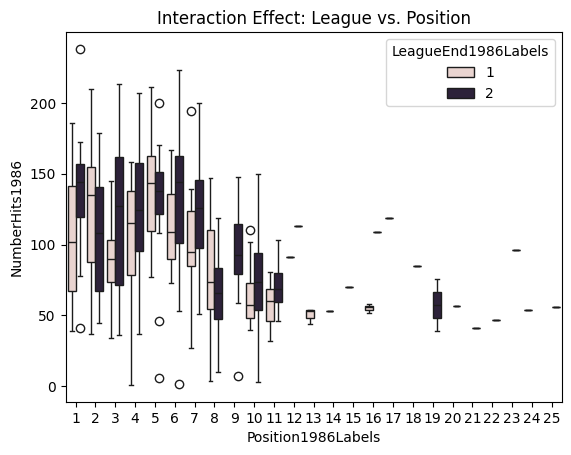